In [13]:
import os 
import sys
from os.path import join as opj
import shutil
from glob import glob
def create_original_dataset(dataset_template, dataset_config, contrasts=['cue', 'lf', 'lh', 'rf', 'rh', 't'], 
                            rm_existing=False):
    '''
    Performs original dataset creation (make directory, copy and rename files, creates txt file containing IDs)
    Works for SPM and FSL datasets obtained with hcp_pipelines scripts. 
    
    
    Parameters:
        - dataset_template: str, template for glob function (e.g. path to be able to find all data of the dataset)
        - dataset_config: dict, dictionnary with 3 keys (SOFT, FWHM and MC_PARAM) and values corresponding 
                                to the attributes of the dataset
    '''
    # Dataset name for directory
    dataset_name = 'DATASET_'+'_'.join([str(i)+'_'+str(y) for i,y in dataset_config.items()])
    
    # Create directories or remove them if already exists
    if not os.path.exists(f'../data/derived/{dataset_name}'):
        print('Creating dataset...')
        os.mkdir(f'../data/derived/{dataset_name}')
        os.mkdir(f'../data/derived/{dataset_name}/original')
    else:
        if rm_existing:
            print('Removing existing directory...')
            shutil.rmtree(f'../data/derived/{dataset_name}')
            os.mkdir(f'../data/derived/{dataset_name}')
            os.mkdir(f'../data/derived/{dataset_name}/original')
        else: 
            print('Dataset already exist.')
            sys.exit()
    
    # Find all files of the dataset, rename them and copy them in the correct directory
    id_list=[]
    for file in sorted(glob(dataset_template)):
        if dataset_config['SOFT']=='SPM':
            new_id = 'sub_' + file.split('/')[-2].split('_')[-3] + '_contrast_' + file.split('/')[-2].split('_')[2] #contrasts[int(file[-5])-1]
            print('Copying file:', new_id)
            new_file = f'../data/derived/{dataset_name}/original/{new_id}.nii'
        elif dataset_config['SOFT']=='FSL':
            new_id = 'sub_' + file.split('/')[-2].split('_')[-3] + '_contrast_' + contrasts[int(file.split('/')[-1][4])-1]
            #new_id = 'sub_' + file.split('/')[-2].split('_')[-3] + '_contrast_' + file.split('/')[-2].split('_')[2]
            print('Copying file:', new_id)
            new_file = f'../data/derived/{dataset_name}/original/{new_id}.nii.gz'
        id_list.append(new_id)
        shutil.copyfile(file, new_file)
    
    # Write ids in a txt file that will be used for creating a Dataset object
    with open(opj(f'../data/derived/{dataset_name}/{dataset_name}_IDS.txt'), "w") as file:
        for ids in id_list:
            file.write(str(ids))
            file.write('\n')
    file.close()

In [15]:
from glob import glob
soft = 'FSL'
for fwhm in [8]:
    for nb_param in [0, 6, 24]:
        hrf_t='derivatives'
        hrf=1

        dataset_template = f'/Volumes/EMPENN/hcp_pipelines/spm_preprocessing/l1_analysis_spm/_contrast_*_fwhm_{fwhm}_nb_param_{nb_param}_subject_id_*_task_MOTOR/spmT*'
        dataset_config = {'SOFT': soft, 'FWHM':fwhm, 'MC_PARAM':nb_param, 'HRF':hrf}
        create_original_dataset(dataset_template, dataset_config, contrasts=['cue', 'lf', 'lh', 'rf', 'rh', 't'])

Creating dataset...
Copying file: sub_100206_contrast_cue
Copying file: sub_100307_contrast_cue
Copying file: sub_100408_contrast_cue
Copying file: sub_100610_contrast_cue
Copying file: sub_101006_contrast_cue
Copying file: sub_101107_contrast_cue
Copying file: sub_101309_contrast_cue
Copying file: sub_101410_contrast_cue
Copying file: sub_101915_contrast_cue
Copying file: sub_102008_contrast_cue
Copying file: sub_102109_contrast_cue
Copying file: sub_102311_contrast_cue
Copying file: sub_102513_contrast_cue
Copying file: sub_102614_contrast_cue
Copying file: sub_102715_contrast_cue
Copying file: sub_102816_contrast_cue
Copying file: sub_103010_contrast_cue
Copying file: sub_103111_contrast_cue
Copying file: sub_103212_contrast_cue
Copying file: sub_103414_contrast_cue
Copying file: sub_103515_contrast_cue
Copying file: sub_103818_contrast_cue
Copying file: sub_104012_contrast_cue
Copying file: sub_104416_contrast_cue
Copying file: sub_104820_contrast_cue
Copying file: sub_105014_contr

Copying file: sub_145127_contrast_cue
Copying file: sub_145531_contrast_cue
Copying file: sub_145632_contrast_cue
Copying file: sub_145834_contrast_cue
Copying file: sub_146129_contrast_cue
Copying file: sub_146331_contrast_cue
Copying file: sub_146432_contrast_cue
Copying file: sub_146533_contrast_cue
Copying file: sub_146735_contrast_cue
Copying file: sub_146836_contrast_cue
Copying file: sub_146937_contrast_cue
Copying file: sub_147030_contrast_cue
Copying file: sub_147636_contrast_cue
Copying file: sub_147737_contrast_cue
Copying file: sub_148032_contrast_cue
Copying file: sub_148133_contrast_cue
Copying file: sub_148335_contrast_cue
Copying file: sub_148436_contrast_cue
Copying file: sub_148840_contrast_cue
Copying file: sub_148941_contrast_cue
Copying file: sub_149236_contrast_cue
Copying file: sub_149337_contrast_cue
Copying file: sub_149539_contrast_cue
Copying file: sub_149741_contrast_cue
Copying file: sub_149842_contrast_cue
Copying file: sub_150019_contrast_cue
Copying file

Copying file: sub_188751_contrast_cue
Copying file: sub_189349_contrast_cue
Copying file: sub_189450_contrast_cue
Copying file: sub_189652_contrast_cue
Copying file: sub_190031_contrast_cue
Copying file: sub_191033_contrast_cue
Copying file: sub_191235_contrast_cue
Copying file: sub_191336_contrast_cue
Copying file: sub_191437_contrast_cue
Copying file: sub_191841_contrast_cue
Copying file: sub_191942_contrast_cue
Copying file: sub_192035_contrast_cue
Copying file: sub_192136_contrast_cue
Copying file: sub_192237_contrast_cue
Copying file: sub_192439_contrast_cue
Copying file: sub_192540_contrast_cue
Copying file: sub_192641_contrast_cue
Copying file: sub_192843_contrast_cue
Copying file: sub_193239_contrast_cue
Copying file: sub_193441_contrast_cue
Copying file: sub_193845_contrast_cue
Copying file: sub_194140_contrast_cue
Copying file: sub_194443_contrast_cue
Copying file: sub_194645_contrast_cue
Copying file: sub_194746_contrast_cue
Copying file: sub_194847_contrast_cue
Copying file

Copying file: sub_135124_contrast_lf
Copying file: sub_135225_contrast_lf
Copying file: sub_135528_contrast_lf
Copying file: sub_135629_contrast_lf
Copying file: sub_135730_contrast_lf
Copying file: sub_135932_contrast_lf
Copying file: sub_136126_contrast_lf
Copying file: sub_136227_contrast_lf
Copying file: sub_136631_contrast_lf
Copying file: sub_136732_contrast_lf
Copying file: sub_136833_contrast_lf
Copying file: sub_137027_contrast_lf
Copying file: sub_137128_contrast_lf
Copying file: sub_137229_contrast_lf
Copying file: sub_137431_contrast_lf
Copying file: sub_137532_contrast_lf
Copying file: sub_137633_contrast_lf
Copying file: sub_137936_contrast_lf
Copying file: sub_138130_contrast_lf
Copying file: sub_138231_contrast_lf
Copying file: sub_138332_contrast_lf
Copying file: sub_138534_contrast_lf
Copying file: sub_138837_contrast_lf
Copying file: sub_139233_contrast_lf
Copying file: sub_139435_contrast_lf
Copying file: sub_139637_contrast_lf
Copying file: sub_139839_contrast_lf
C

Copying file: sub_179548_contrast_lf
Copying file: sub_179952_contrast_lf
Copying file: sub_180129_contrast_lf
Copying file: sub_180230_contrast_lf
Copying file: sub_180432_contrast_lf
Copying file: sub_180533_contrast_lf
Copying file: sub_180735_contrast_lf
Copying file: sub_180836_contrast_lf
Copying file: sub_180937_contrast_lf
Copying file: sub_181131_contrast_lf
Copying file: sub_181232_contrast_lf
Copying file: sub_181636_contrast_lf
Copying file: sub_182032_contrast_lf
Copying file: sub_182436_contrast_lf
Copying file: sub_182739_contrast_lf
Copying file: sub_182840_contrast_lf
Copying file: sub_183034_contrast_lf
Copying file: sub_183337_contrast_lf
Copying file: sub_183741_contrast_lf
Copying file: sub_185038_contrast_lf
Copying file: sub_185139_contrast_lf
Copying file: sub_185341_contrast_lf
Copying file: sub_185442_contrast_lf
Copying file: sub_185846_contrast_lf
Copying file: sub_185947_contrast_lf
Copying file: sub_186040_contrast_lf
Copying file: sub_186141_contrast_lf
C

Copying file: sub_127731_contrast_lh
Copying file: sub_127832_contrast_lh
Copying file: sub_127933_contrast_lh
Copying file: sub_128026_contrast_lh
Copying file: sub_128127_contrast_lh
Copying file: sub_128935_contrast_lh
Copying file: sub_129028_contrast_lh
Copying file: sub_129129_contrast_lh
Copying file: sub_129331_contrast_lh
Copying file: sub_129634_contrast_lh
Copying file: sub_129937_contrast_lh
Copying file: sub_130013_contrast_lh
Copying file: sub_130114_contrast_lh
Copying file: sub_130316_contrast_lh
Copying file: sub_130417_contrast_lh
Copying file: sub_130518_contrast_lh
Copying file: sub_130619_contrast_lh
Copying file: sub_130720_contrast_lh
Copying file: sub_130821_contrast_lh
Copying file: sub_130922_contrast_lh
Copying file: sub_131419_contrast_lh
Copying file: sub_131722_contrast_lh
Copying file: sub_131823_contrast_lh
Copying file: sub_131924_contrast_lh
Copying file: sub_132017_contrast_lh
Copying file: sub_132118_contrast_lh
Copying file: sub_133019_contrast_lh
C

Copying file: sub_172938_contrast_lh
Copying file: sub_173132_contrast_lh
Copying file: sub_173233_contrast_lh
Copying file: sub_173334_contrast_lh
Copying file: sub_173435_contrast_lh
Copying file: sub_173536_contrast_lh
Copying file: sub_173637_contrast_lh
Copying file: sub_173738_contrast_lh
Copying file: sub_173839_contrast_lh
Copying file: sub_173940_contrast_lh
Copying file: sub_174437_contrast_lh
Copying file: sub_174841_contrast_lh
Copying file: sub_175035_contrast_lh
Copying file: sub_175136_contrast_lh
Copying file: sub_175237_contrast_lh
Copying file: sub_175338_contrast_lh
Copying file: sub_175439_contrast_lh
Copying file: sub_175540_contrast_lh
Copying file: sub_175742_contrast_lh
Copying file: sub_176037_contrast_lh
Copying file: sub_176239_contrast_lh
Copying file: sub_176441_contrast_lh
Copying file: sub_176542_contrast_lh
Copying file: sub_176845_contrast_lh
Copying file: sub_177140_contrast_lh
Copying file: sub_177241_contrast_lh
Copying file: sub_177342_contrast_lh
C

Copying file: sub_119732_contrast_rf
Copying file: sub_119833_contrast_rf
Copying file: sub_120010_contrast_rf
Copying file: sub_120111_contrast_rf
Copying file: sub_120212_contrast_rf
Copying file: sub_120414_contrast_rf
Copying file: sub_120515_contrast_rf
Copying file: sub_120717_contrast_rf
Copying file: sub_121315_contrast_rf
Copying file: sub_121416_contrast_rf
Copying file: sub_121618_contrast_rf
Copying file: sub_121719_contrast_rf
Copying file: sub_121820_contrast_rf
Copying file: sub_121921_contrast_rf
Copying file: sub_122317_contrast_rf
Copying file: sub_122418_contrast_rf
Copying file: sub_122620_contrast_rf
Copying file: sub_122822_contrast_rf
Copying file: sub_123117_contrast_rf
Copying file: sub_123420_contrast_rf
Copying file: sub_123723_contrast_rf
Copying file: sub_123824_contrast_rf
Copying file: sub_123925_contrast_rf
Copying file: sub_124220_contrast_rf
Copying file: sub_124422_contrast_rf
Copying file: sub_124624_contrast_rf
Copying file: sub_124826_contrast_rf
C

Copying file: sub_165436_contrast_rf
Copying file: sub_165638_contrast_rf
Copying file: sub_165840_contrast_rf
Copying file: sub_165941_contrast_rf
Copying file: sub_166438_contrast_rf
Copying file: sub_166640_contrast_rf
Copying file: sub_167036_contrast_rf
Copying file: sub_167238_contrast_rf
Copying file: sub_167440_contrast_rf
Copying file: sub_167743_contrast_rf
Copying file: sub_168139_contrast_rf
Copying file: sub_168240_contrast_rf
Copying file: sub_168341_contrast_rf
Copying file: sub_168745_contrast_rf
Copying file: sub_168947_contrast_rf
Copying file: sub_169040_contrast_rf
Copying file: sub_169141_contrast_rf
Copying file: sub_169343_contrast_rf
Copying file: sub_169444_contrast_rf
Copying file: sub_169545_contrast_rf
Copying file: sub_169747_contrast_rf
Copying file: sub_169949_contrast_rf
Copying file: sub_170631_contrast_rf
Copying file: sub_170934_contrast_rf
Copying file: sub_171128_contrast_rf
Copying file: sub_171330_contrast_rf
Copying file: sub_171431_contrast_rf
C

Copying file: sub_112819_contrast_rh
Copying file: sub_112920_contrast_rh
Copying file: sub_113215_contrast_rh
Copying file: sub_113316_contrast_rh
Copying file: sub_113417_contrast_rh
Copying file: sub_113619_contrast_rh
Copying file: sub_113821_contrast_rh
Copying file: sub_113922_contrast_rh
Copying file: sub_114116_contrast_rh
Copying file: sub_114217_contrast_rh
Copying file: sub_114318_contrast_rh
Copying file: sub_114419_contrast_rh
Copying file: sub_114621_contrast_rh
Copying file: sub_114823_contrast_rh
Copying file: sub_114924_contrast_rh
Copying file: sub_115017_contrast_rh
Copying file: sub_115219_contrast_rh
Copying file: sub_115320_contrast_rh
Copying file: sub_115724_contrast_rh
Copying file: sub_115825_contrast_rh
Copying file: sub_116221_contrast_rh
Copying file: sub_116423_contrast_rh
Copying file: sub_116524_contrast_rh
Copying file: sub_116726_contrast_rh
Copying file: sub_117021_contrast_rh
Copying file: sub_117122_contrast_rh
Copying file: sub_117324_contrast_rh
C

Copying file: sub_156637_contrast_rh
Copying file: sub_157336_contrast_rh
Copying file: sub_157437_contrast_rh
Copying file: sub_157942_contrast_rh
Copying file: sub_158035_contrast_rh
Copying file: sub_158136_contrast_rh
Copying file: sub_158338_contrast_rh
Copying file: sub_158540_contrast_rh
Copying file: sub_158843_contrast_rh
Copying file: sub_159138_contrast_rh
Copying file: sub_159239_contrast_rh
Copying file: sub_159340_contrast_rh
Copying file: sub_159441_contrast_rh
Copying file: sub_159744_contrast_rh
Copying file: sub_159845_contrast_rh
Copying file: sub_159946_contrast_rh
Copying file: sub_160123_contrast_rh
Copying file: sub_160729_contrast_rh
Copying file: sub_160830_contrast_rh
Copying file: sub_160931_contrast_rh
Copying file: sub_161327_contrast_rh
Copying file: sub_161630_contrast_rh
Copying file: sub_161731_contrast_rh
Copying file: sub_161832_contrast_rh
Copying file: sub_162026_contrast_rh
Copying file: sub_162228_contrast_rh
Copying file: sub_162329_contrast_rh
C

Copying file: sub_103818_contrast_t
Copying file: sub_104012_contrast_t
Copying file: sub_104416_contrast_t
Copying file: sub_104820_contrast_t
Copying file: sub_105014_contrast_t
Copying file: sub_105115_contrast_t
Copying file: sub_105216_contrast_t
Copying file: sub_105620_contrast_t
Copying file: sub_105923_contrast_t
Copying file: sub_106016_contrast_t
Copying file: sub_106319_contrast_t
Copying file: sub_106521_contrast_t
Copying file: sub_106824_contrast_t
Copying file: sub_107018_contrast_t
Copying file: sub_107220_contrast_t
Copying file: sub_107321_contrast_t
Copying file: sub_107422_contrast_t
Copying file: sub_107725_contrast_t
Copying file: sub_108020_contrast_t
Copying file: sub_108121_contrast_t
Copying file: sub_108222_contrast_t
Copying file: sub_108323_contrast_t
Copying file: sub_108525_contrast_t
Copying file: sub_108828_contrast_t
Copying file: sub_109123_contrast_t
Copying file: sub_109325_contrast_t
Copying file: sub_109830_contrast_t
Copying file: sub_110007_con

Copying file: sub_151324_contrast_t
Copying file: sub_151425_contrast_t
Copying file: sub_151526_contrast_t
Copying file: sub_151627_contrast_t
Copying file: sub_151728_contrast_t
Copying file: sub_151829_contrast_t
Copying file: sub_151930_contrast_t
Copying file: sub_152225_contrast_t
Copying file: sub_152427_contrast_t
Copying file: sub_152831_contrast_t
Copying file: sub_153025_contrast_t
Copying file: sub_153126_contrast_t
Copying file: sub_153227_contrast_t
Copying file: sub_153429_contrast_t
Copying file: sub_153631_contrast_t
Copying file: sub_153732_contrast_t
Copying file: sub_153833_contrast_t
Copying file: sub_153934_contrast_t
Copying file: sub_154229_contrast_t
Copying file: sub_154330_contrast_t
Copying file: sub_154431_contrast_t
Copying file: sub_154532_contrast_t
Copying file: sub_154734_contrast_t
Copying file: sub_154835_contrast_t
Copying file: sub_154936_contrast_t
Copying file: sub_155231_contrast_t
Copying file: sub_155635_contrast_t
Copying file: sub_155938_con

Copying file: sub_199150_contrast_t
Copying file: sub_199251_contrast_t
Copying file: sub_199352_contrast_t
Copying file: sub_199453_contrast_t
Copying file: sub_199655_contrast_t
Copying file: sub_199958_contrast_t
Creating dataset...
Copying file: sub_100206_contrast_cue
Copying file: sub_100307_contrast_cue
Copying file: sub_100408_contrast_cue
Copying file: sub_100610_contrast_cue
Copying file: sub_101006_contrast_cue
Copying file: sub_101107_contrast_cue
Copying file: sub_101309_contrast_cue
Copying file: sub_101410_contrast_cue
Copying file: sub_101915_contrast_cue
Copying file: sub_102008_contrast_cue
Copying file: sub_102109_contrast_cue
Copying file: sub_102311_contrast_cue
Copying file: sub_102513_contrast_cue
Copying file: sub_102614_contrast_cue
Copying file: sub_102715_contrast_cue
Copying file: sub_102816_contrast_cue
Copying file: sub_103010_contrast_cue
Copying file: sub_103111_contrast_cue
Copying file: sub_103212_contrast_cue
Copying file: sub_103414_contrast_cue
Copy

Copying file: sub_144125_contrast_cue
Copying file: sub_144226_contrast_cue
Copying file: sub_144428_contrast_cue
Copying file: sub_144731_contrast_cue
Copying file: sub_144832_contrast_cue
Copying file: sub_144933_contrast_cue
Copying file: sub_145127_contrast_cue
Copying file: sub_145531_contrast_cue
Copying file: sub_145632_contrast_cue
Copying file: sub_145834_contrast_cue
Copying file: sub_146129_contrast_cue
Copying file: sub_146331_contrast_cue
Copying file: sub_146432_contrast_cue
Copying file: sub_146533_contrast_cue
Copying file: sub_146735_contrast_cue
Copying file: sub_146836_contrast_cue
Copying file: sub_146937_contrast_cue
Copying file: sub_147030_contrast_cue
Copying file: sub_147636_contrast_cue
Copying file: sub_147737_contrast_cue
Copying file: sub_148032_contrast_cue
Copying file: sub_148133_contrast_cue
Copying file: sub_148335_contrast_cue
Copying file: sub_148436_contrast_cue
Copying file: sub_148840_contrast_cue
Copying file: sub_148941_contrast_cue
Copying file

Copying file: sub_187850_contrast_cue
Copying file: sub_188145_contrast_cue
Copying file: sub_188347_contrast_cue
Copying file: sub_188448_contrast_cue
Copying file: sub_188549_contrast_cue
Copying file: sub_188751_contrast_cue
Copying file: sub_189349_contrast_cue
Copying file: sub_189450_contrast_cue
Copying file: sub_189652_contrast_cue
Copying file: sub_190031_contrast_cue
Copying file: sub_191033_contrast_cue
Copying file: sub_191235_contrast_cue
Copying file: sub_191336_contrast_cue
Copying file: sub_191437_contrast_cue
Copying file: sub_191841_contrast_cue
Copying file: sub_191942_contrast_cue
Copying file: sub_192035_contrast_cue
Copying file: sub_192136_contrast_cue
Copying file: sub_192237_contrast_cue
Copying file: sub_192439_contrast_cue
Copying file: sub_192540_contrast_cue
Copying file: sub_192641_contrast_cue
Copying file: sub_192843_contrast_cue
Copying file: sub_193239_contrast_cue
Copying file: sub_193441_contrast_cue
Copying file: sub_193845_contrast_cue
Copying file

Copying file: sub_134223_contrast_lf
Copying file: sub_134324_contrast_lf
Copying file: sub_134425_contrast_lf
Copying file: sub_134627_contrast_lf
Copying file: sub_134728_contrast_lf
Copying file: sub_134829_contrast_lf
Copying file: sub_135124_contrast_lf
Copying file: sub_135225_contrast_lf
Copying file: sub_135528_contrast_lf
Copying file: sub_135629_contrast_lf
Copying file: sub_135730_contrast_lf
Copying file: sub_135932_contrast_lf
Copying file: sub_136126_contrast_lf
Copying file: sub_136227_contrast_lf
Copying file: sub_136631_contrast_lf
Copying file: sub_136732_contrast_lf
Copying file: sub_136833_contrast_lf
Copying file: sub_137027_contrast_lf
Copying file: sub_137128_contrast_lf
Copying file: sub_137229_contrast_lf
Copying file: sub_137431_contrast_lf
Copying file: sub_137532_contrast_lf
Copying file: sub_137633_contrast_lf
Copying file: sub_137936_contrast_lf
Copying file: sub_138130_contrast_lf
Copying file: sub_138231_contrast_lf
Copying file: sub_138332_contrast_lf
C

Copying file: sub_178243_contrast_lf
Copying file: sub_178647_contrast_lf
Copying file: sub_178748_contrast_lf
Copying file: sub_178849_contrast_lf
Copying file: sub_178950_contrast_lf
Copying file: sub_179245_contrast_lf
Copying file: sub_179346_contrast_lf
Copying file: sub_179548_contrast_lf
Copying file: sub_179952_contrast_lf
Copying file: sub_180129_contrast_lf
Copying file: sub_180230_contrast_lf
Copying file: sub_180432_contrast_lf
Copying file: sub_180533_contrast_lf
Copying file: sub_180735_contrast_lf
Copying file: sub_180836_contrast_lf
Copying file: sub_180937_contrast_lf
Copying file: sub_181131_contrast_lf
Copying file: sub_181232_contrast_lf
Copying file: sub_181636_contrast_lf
Copying file: sub_182032_contrast_lf
Copying file: sub_182436_contrast_lf
Copying file: sub_182739_contrast_lf
Copying file: sub_182840_contrast_lf
Copying file: sub_183034_contrast_lf
Copying file: sub_183337_contrast_lf
Copying file: sub_183741_contrast_lf
Copying file: sub_185038_contrast_lf
C

Copying file: sub_125424_contrast_lh
Copying file: sub_125525_contrast_lh
Copying file: sub_126325_contrast_lh
Copying file: sub_126426_contrast_lh
Copying file: sub_126628_contrast_lh
Copying file: sub_127226_contrast_lh
Copying file: sub_127327_contrast_lh
Copying file: sub_127630_contrast_lh
Copying file: sub_127731_contrast_lh
Copying file: sub_127832_contrast_lh
Copying file: sub_127933_contrast_lh
Copying file: sub_128026_contrast_lh
Copying file: sub_128127_contrast_lh
Copying file: sub_128935_contrast_lh
Copying file: sub_129028_contrast_lh
Copying file: sub_129129_contrast_lh
Copying file: sub_129331_contrast_lh
Copying file: sub_129634_contrast_lh
Copying file: sub_129937_contrast_lh
Copying file: sub_130013_contrast_lh
Copying file: sub_130114_contrast_lh
Copying file: sub_130316_contrast_lh
Copying file: sub_130417_contrast_lh
Copying file: sub_130518_contrast_lh
Copying file: sub_130619_contrast_lh
Copying file: sub_130720_contrast_lh
Copying file: sub_130821_contrast_lh
C

Copying file: sub_171532_contrast_lh
Copying file: sub_171633_contrast_lh
Copying file: sub_171734_contrast_lh
Copying file: sub_172029_contrast_lh
Copying file: sub_172130_contrast_lh
Copying file: sub_172332_contrast_lh
Copying file: sub_172433_contrast_lh
Copying file: sub_172534_contrast_lh
Copying file: sub_172635_contrast_lh
Copying file: sub_172938_contrast_lh
Copying file: sub_173132_contrast_lh
Copying file: sub_173233_contrast_lh
Copying file: sub_173334_contrast_lh
Copying file: sub_173435_contrast_lh
Copying file: sub_173536_contrast_lh
Copying file: sub_173637_contrast_lh
Copying file: sub_173738_contrast_lh
Copying file: sub_173839_contrast_lh
Copying file: sub_173940_contrast_lh
Copying file: sub_174437_contrast_lh
Copying file: sub_174841_contrast_lh
Copying file: sub_175035_contrast_lh
Copying file: sub_175136_contrast_lh
Copying file: sub_175237_contrast_lh
Copying file: sub_175338_contrast_lh
Copying file: sub_175439_contrast_lh
Copying file: sub_175540_contrast_lh
C

Copying file: sub_117728_contrast_rf
Copying file: sub_117930_contrast_rf
Copying file: sub_118023_contrast_rf
Copying file: sub_118124_contrast_rf
Copying file: sub_118225_contrast_rf
Copying file: sub_118528_contrast_rf
Copying file: sub_118730_contrast_rf
Copying file: sub_118831_contrast_rf
Copying file: sub_118932_contrast_rf
Copying file: sub_119025_contrast_rf
Copying file: sub_119126_contrast_rf
Copying file: sub_119732_contrast_rf
Copying file: sub_119833_contrast_rf
Copying file: sub_120010_contrast_rf
Copying file: sub_120111_contrast_rf
Copying file: sub_120212_contrast_rf
Copying file: sub_120414_contrast_rf
Copying file: sub_120515_contrast_rf
Copying file: sub_120717_contrast_rf
Copying file: sub_121315_contrast_rf
Copying file: sub_121416_contrast_rf
Copying file: sub_121618_contrast_rf
Copying file: sub_121719_contrast_rf
Copying file: sub_121820_contrast_rf
Copying file: sub_121921_contrast_rf
Copying file: sub_122317_contrast_rf
Copying file: sub_122418_contrast_rf
C

Copying file: sub_162935_contrast_rf
Copying file: sub_163129_contrast_rf
Copying file: sub_163331_contrast_rf
Copying file: sub_163432_contrast_rf
Copying file: sub_163836_contrast_rf
Copying file: sub_164030_contrast_rf
Copying file: sub_164131_contrast_rf
Copying file: sub_164636_contrast_rf
Copying file: sub_164939_contrast_rf
Copying file: sub_165032_contrast_rf
Copying file: sub_165234_contrast_rf
Copying file: sub_165436_contrast_rf
Copying file: sub_165638_contrast_rf
Copying file: sub_165840_contrast_rf
Copying file: sub_165941_contrast_rf
Copying file: sub_166438_contrast_rf
Copying file: sub_166640_contrast_rf
Copying file: sub_167036_contrast_rf
Copying file: sub_167238_contrast_rf
Copying file: sub_167440_contrast_rf
Copying file: sub_167743_contrast_rf
Copying file: sub_168139_contrast_rf
Copying file: sub_168240_contrast_rf
Copying file: sub_168341_contrast_rf
Copying file: sub_168745_contrast_rf
Copying file: sub_168947_contrast_rf
Copying file: sub_169040_contrast_rf
C

Copying file: sub_111009_contrast_rh
Copying file: sub_111211_contrast_rh
Copying file: sub_111312_contrast_rh
Copying file: sub_111413_contrast_rh
Copying file: sub_111514_contrast_rh
Copying file: sub_111716_contrast_rh
Copying file: sub_112112_contrast_rh
Copying file: sub_112314_contrast_rh
Copying file: sub_112516_contrast_rh
Copying file: sub_112819_contrast_rh
Copying file: sub_112920_contrast_rh
Copying file: sub_113215_contrast_rh
Copying file: sub_113316_contrast_rh
Copying file: sub_113417_contrast_rh
Copying file: sub_113619_contrast_rh
Copying file: sub_113821_contrast_rh
Copying file: sub_113922_contrast_rh
Copying file: sub_114116_contrast_rh
Copying file: sub_114217_contrast_rh
Copying file: sub_114318_contrast_rh
Copying file: sub_114419_contrast_rh
Copying file: sub_114621_contrast_rh
Copying file: sub_114823_contrast_rh
Copying file: sub_114924_contrast_rh
Copying file: sub_115017_contrast_rh
Copying file: sub_115219_contrast_rh
Copying file: sub_115320_contrast_rh
C

Copying file: sub_154835_contrast_rh
Copying file: sub_154936_contrast_rh
Copying file: sub_155231_contrast_rh
Copying file: sub_155635_contrast_rh
Copying file: sub_155938_contrast_rh
Copying file: sub_156031_contrast_rh
Copying file: sub_156233_contrast_rh
Copying file: sub_156334_contrast_rh
Copying file: sub_156435_contrast_rh
Copying file: sub_156536_contrast_rh
Copying file: sub_156637_contrast_rh
Copying file: sub_157336_contrast_rh
Copying file: sub_157437_contrast_rh
Copying file: sub_157942_contrast_rh
Copying file: sub_158035_contrast_rh
Copying file: sub_158136_contrast_rh
Copying file: sub_158338_contrast_rh
Copying file: sub_158540_contrast_rh
Copying file: sub_158843_contrast_rh
Copying file: sub_159138_contrast_rh
Copying file: sub_159239_contrast_rh
Copying file: sub_159340_contrast_rh
Copying file: sub_159441_contrast_rh
Copying file: sub_159744_contrast_rh
Copying file: sub_159845_contrast_rh
Copying file: sub_159946_contrast_rh
Copying file: sub_160123_contrast_rh
C

Copying file: sub_102513_contrast_t
Copying file: sub_102614_contrast_t
Copying file: sub_102715_contrast_t
Copying file: sub_102816_contrast_t
Copying file: sub_103010_contrast_t
Copying file: sub_103111_contrast_t
Copying file: sub_103212_contrast_t
Copying file: sub_103414_contrast_t
Copying file: sub_103515_contrast_t
Copying file: sub_103818_contrast_t
Copying file: sub_104012_contrast_t
Copying file: sub_104416_contrast_t
Copying file: sub_104820_contrast_t
Copying file: sub_105014_contrast_t
Copying file: sub_105115_contrast_t
Copying file: sub_105216_contrast_t
Copying file: sub_105620_contrast_t
Copying file: sub_105923_contrast_t
Copying file: sub_106016_contrast_t
Copying file: sub_106319_contrast_t
Copying file: sub_106521_contrast_t
Copying file: sub_106824_contrast_t
Copying file: sub_107018_contrast_t
Copying file: sub_107220_contrast_t
Copying file: sub_107321_contrast_t
Copying file: sub_107422_contrast_t
Copying file: sub_107725_contrast_t
Copying file: sub_108020_con

Copying file: sub_149842_contrast_t
Copying file: sub_150019_contrast_t
Copying file: sub_150423_contrast_t
Copying file: sub_150524_contrast_t
Copying file: sub_150625_contrast_t
Copying file: sub_150726_contrast_t
Copying file: sub_150928_contrast_t
Copying file: sub_151021_contrast_t
Copying file: sub_151223_contrast_t
Copying file: sub_151324_contrast_t
Copying file: sub_151425_contrast_t
Copying file: sub_151526_contrast_t
Copying file: sub_151627_contrast_t
Copying file: sub_151728_contrast_t
Copying file: sub_151829_contrast_t
Copying file: sub_151930_contrast_t
Copying file: sub_152225_contrast_t
Copying file: sub_152427_contrast_t
Copying file: sub_152831_contrast_t
Copying file: sub_153025_contrast_t
Copying file: sub_153126_contrast_t
Copying file: sub_153227_contrast_t
Copying file: sub_153429_contrast_t
Copying file: sub_153631_contrast_t
Copying file: sub_153732_contrast_t
Copying file: sub_153833_contrast_t
Copying file: sub_153934_contrast_t
Copying file: sub_154229_con

Copying file: sub_196952_contrast_t
Copying file: sub_197348_contrast_t
Copying file: sub_197550_contrast_t
Copying file: sub_198047_contrast_t
Copying file: sub_198249_contrast_t
Copying file: sub_198350_contrast_t
Copying file: sub_198451_contrast_t
Copying file: sub_198653_contrast_t
Copying file: sub_198855_contrast_t
Copying file: sub_199150_contrast_t
Copying file: sub_199251_contrast_t
Copying file: sub_199352_contrast_t
Copying file: sub_199453_contrast_t
Copying file: sub_199655_contrast_t
Copying file: sub_199958_contrast_t
Creating dataset...
Copying file: sub_100206_contrast_cue
Copying file: sub_100307_contrast_cue
Copying file: sub_100408_contrast_cue
Copying file: sub_100610_contrast_cue
Copying file: sub_101006_contrast_cue
Copying file: sub_101107_contrast_cue
Copying file: sub_101309_contrast_cue
Copying file: sub_101410_contrast_cue
Copying file: sub_101915_contrast_cue
Copying file: sub_102008_contrast_cue
Copying file: sub_102109_contrast_cue
Copying file: sub_1023

Copying file: sub_141422_contrast_cue
Copying file: sub_141826_contrast_cue
Copying file: sub_142424_contrast_cue
Copying file: sub_142828_contrast_cue
Copying file: sub_143224_contrast_cue
Copying file: sub_143325_contrast_cue
Copying file: sub_143426_contrast_cue
Copying file: sub_143830_contrast_cue
Copying file: sub_144125_contrast_cue
Copying file: sub_144226_contrast_cue
Copying file: sub_144428_contrast_cue
Copying file: sub_144731_contrast_cue
Copying file: sub_144832_contrast_cue
Copying file: sub_144933_contrast_cue
Copying file: sub_145127_contrast_cue
Copying file: sub_145531_contrast_cue
Copying file: sub_145632_contrast_cue
Copying file: sub_145834_contrast_cue
Copying file: sub_146129_contrast_cue
Copying file: sub_146331_contrast_cue
Copying file: sub_146432_contrast_cue
Copying file: sub_146533_contrast_cue
Copying file: sub_146735_contrast_cue
Copying file: sub_146836_contrast_cue
Copying file: sub_146937_contrast_cue
Copying file: sub_147030_contrast_cue
Copying file

Copying file: sub_185947_contrast_cue
Copying file: sub_186040_contrast_cue
Copying file: sub_186141_contrast_cue
Copying file: sub_186444_contrast_cue
Copying file: sub_186545_contrast_cue
Copying file: sub_186848_contrast_cue
Copying file: sub_186949_contrast_cue
Copying file: sub_187143_contrast_cue
Copying file: sub_187345_contrast_cue
Copying file: sub_187547_contrast_cue
Copying file: sub_187850_contrast_cue
Copying file: sub_188145_contrast_cue
Copying file: sub_188347_contrast_cue
Copying file: sub_188448_contrast_cue
Copying file: sub_188549_contrast_cue
Copying file: sub_188751_contrast_cue
Copying file: sub_189349_contrast_cue
Copying file: sub_189450_contrast_cue
Copying file: sub_189652_contrast_cue
Copying file: sub_190031_contrast_cue
Copying file: sub_191033_contrast_cue
Copying file: sub_191235_contrast_cue
Copying file: sub_191336_contrast_cue
Copying file: sub_191437_contrast_cue
Copying file: sub_191841_contrast_cue
Copying file: sub_191942_contrast_cue
Copying file

Copying file: sub_131924_contrast_lf
Copying file: sub_132017_contrast_lf
Copying file: sub_132118_contrast_lf
Copying file: sub_133019_contrast_lf
Copying file: sub_133625_contrast_lf
Copying file: sub_133827_contrast_lf
Copying file: sub_133928_contrast_lf
Copying file: sub_134021_contrast_lf
Copying file: sub_134223_contrast_lf
Copying file: sub_134324_contrast_lf
Copying file: sub_134425_contrast_lf
Copying file: sub_134627_contrast_lf
Copying file: sub_134728_contrast_lf
Copying file: sub_134829_contrast_lf
Copying file: sub_135124_contrast_lf
Copying file: sub_135225_contrast_lf
Copying file: sub_135528_contrast_lf
Copying file: sub_135629_contrast_lf
Copying file: sub_135730_contrast_lf
Copying file: sub_135932_contrast_lf
Copying file: sub_136126_contrast_lf
Copying file: sub_136227_contrast_lf
Copying file: sub_136631_contrast_lf
Copying file: sub_136732_contrast_lf
Copying file: sub_136833_contrast_lf
Copying file: sub_137027_contrast_lf
Copying file: sub_137128_contrast_lf
C

Copying file: sub_176542_contrast_lf
Copying file: sub_176845_contrast_lf
Copying file: sub_177140_contrast_lf
Copying file: sub_177241_contrast_lf
Copying file: sub_177342_contrast_lf
Copying file: sub_177645_contrast_lf
Copying file: sub_177746_contrast_lf
Copying file: sub_178142_contrast_lf
Copying file: sub_178243_contrast_lf
Copying file: sub_178647_contrast_lf
Copying file: sub_178748_contrast_lf
Copying file: sub_178849_contrast_lf
Copying file: sub_178950_contrast_lf
Copying file: sub_179245_contrast_lf
Copying file: sub_179346_contrast_lf
Copying file: sub_179548_contrast_lf
Copying file: sub_179952_contrast_lf
Copying file: sub_180129_contrast_lf
Copying file: sub_180230_contrast_lf
Copying file: sub_180432_contrast_lf
Copying file: sub_180533_contrast_lf
Copying file: sub_180735_contrast_lf
Copying file: sub_180836_contrast_lf
Copying file: sub_180937_contrast_lf
Copying file: sub_181131_contrast_lf
Copying file: sub_181232_contrast_lf
Copying file: sub_181636_contrast_lf
C

Copying file: sub_123723_contrast_lh
Copying file: sub_123824_contrast_lh
Copying file: sub_123925_contrast_lh
Copying file: sub_124220_contrast_lh
Copying file: sub_124422_contrast_lh
Copying file: sub_124624_contrast_lh
Copying file: sub_124826_contrast_lh
Copying file: sub_125222_contrast_lh
Copying file: sub_125424_contrast_lh
Copying file: sub_125525_contrast_lh
Copying file: sub_126325_contrast_lh
Copying file: sub_126426_contrast_lh
Copying file: sub_126628_contrast_lh
Copying file: sub_127226_contrast_lh
Copying file: sub_127327_contrast_lh
Copying file: sub_127630_contrast_lh
Copying file: sub_127731_contrast_lh
Copying file: sub_127832_contrast_lh
Copying file: sub_127933_contrast_lh
Copying file: sub_128026_contrast_lh
Copying file: sub_128127_contrast_lh
Copying file: sub_128935_contrast_lh
Copying file: sub_129028_contrast_lh
Copying file: sub_129129_contrast_lh
Copying file: sub_129331_contrast_lh
Copying file: sub_129634_contrast_lh
Copying file: sub_129937_contrast_lh
C

Copying file: sub_169444_contrast_lh
Copying file: sub_169545_contrast_lh
Copying file: sub_169747_contrast_lh
Copying file: sub_169949_contrast_lh
Copying file: sub_170631_contrast_lh
Copying file: sub_170934_contrast_lh
Copying file: sub_171128_contrast_lh
Copying file: sub_171330_contrast_lh
Copying file: sub_171431_contrast_lh
Copying file: sub_171532_contrast_lh
Copying file: sub_171633_contrast_lh
Copying file: sub_171734_contrast_lh
Copying file: sub_172029_contrast_lh
Copying file: sub_172130_contrast_lh
Copying file: sub_172332_contrast_lh
Copying file: sub_172433_contrast_lh
Copying file: sub_172534_contrast_lh
Copying file: sub_172635_contrast_lh
Copying file: sub_172938_contrast_lh
Copying file: sub_173132_contrast_lh
Copying file: sub_173233_contrast_lh
Copying file: sub_173334_contrast_lh
Copying file: sub_173435_contrast_lh
Copying file: sub_173536_contrast_lh
Copying file: sub_173637_contrast_lh
Copying file: sub_173738_contrast_lh
Copying file: sub_173839_contrast_lh
C

Copying file: sub_116221_contrast_rf
Copying file: sub_116423_contrast_rf
Copying file: sub_116524_contrast_rf
Copying file: sub_116726_contrast_rf
Copying file: sub_117021_contrast_rf
Copying file: sub_117122_contrast_rf
Copying file: sub_117324_contrast_rf
Copying file: sub_117728_contrast_rf
Copying file: sub_117930_contrast_rf
Copying file: sub_118023_contrast_rf
Copying file: sub_118124_contrast_rf
Copying file: sub_118225_contrast_rf
Copying file: sub_118528_contrast_rf
Copying file: sub_118730_contrast_rf
Copying file: sub_118831_contrast_rf
Copying file: sub_118932_contrast_rf
Copying file: sub_119025_contrast_rf
Copying file: sub_119126_contrast_rf
Copying file: sub_119732_contrast_rf
Copying file: sub_119833_contrast_rf
Copying file: sub_120010_contrast_rf
Copying file: sub_120111_contrast_rf
Copying file: sub_120212_contrast_rf
Copying file: sub_120414_contrast_rf
Copying file: sub_120515_contrast_rf
Copying file: sub_120717_contrast_rf
Copying file: sub_121315_contrast_rf
C

Copying file: sub_161327_contrast_rf
Copying file: sub_161630_contrast_rf
Copying file: sub_161731_contrast_rf
Copying file: sub_161832_contrast_rf
Copying file: sub_162026_contrast_rf
Copying file: sub_162228_contrast_rf
Copying file: sub_162329_contrast_rf
Copying file: sub_162733_contrast_rf
Copying file: sub_162935_contrast_rf
Copying file: sub_163129_contrast_rf
Copying file: sub_163331_contrast_rf
Copying file: sub_163432_contrast_rf
Copying file: sub_163836_contrast_rf
Copying file: sub_164030_contrast_rf
Copying file: sub_164131_contrast_rf
Copying file: sub_164636_contrast_rf
Copying file: sub_164939_contrast_rf
Copying file: sub_165032_contrast_rf
Copying file: sub_165234_contrast_rf
Copying file: sub_165436_contrast_rf
Copying file: sub_165638_contrast_rf
Copying file: sub_165840_contrast_rf
Copying file: sub_165941_contrast_rf
Copying file: sub_166438_contrast_rf
Copying file: sub_166640_contrast_rf
Copying file: sub_167036_contrast_rf
Copying file: sub_167238_contrast_rf
C

Copying file: sub_108323_contrast_rh
Copying file: sub_108525_contrast_rh
Copying file: sub_108828_contrast_rh
Copying file: sub_109123_contrast_rh
Copying file: sub_109325_contrast_rh
Copying file: sub_109830_contrast_rh
Copying file: sub_110007_contrast_rh
Copying file: sub_110411_contrast_rh
Copying file: sub_110613_contrast_rh
Copying file: sub_111009_contrast_rh
Copying file: sub_111211_contrast_rh
Copying file: sub_111312_contrast_rh
Copying file: sub_111413_contrast_rh
Copying file: sub_111514_contrast_rh
Copying file: sub_111716_contrast_rh
Copying file: sub_112112_contrast_rh
Copying file: sub_112314_contrast_rh
Copying file: sub_112516_contrast_rh
Copying file: sub_112819_contrast_rh
Copying file: sub_112920_contrast_rh
Copying file: sub_113215_contrast_rh
Copying file: sub_113316_contrast_rh
Copying file: sub_113417_contrast_rh
Copying file: sub_113619_contrast_rh
Copying file: sub_113821_contrast_rh
Copying file: sub_113922_contrast_rh
Copying file: sub_114116_contrast_rh
C

Copying file: sub_153732_contrast_rh
Copying file: sub_153833_contrast_rh
Copying file: sub_153934_contrast_rh
Copying file: sub_154229_contrast_rh
Copying file: sub_154330_contrast_rh
Copying file: sub_154431_contrast_rh
Copying file: sub_154532_contrast_rh
Copying file: sub_154734_contrast_rh
Copying file: sub_154835_contrast_rh
Copying file: sub_154936_contrast_rh
Copying file: sub_155231_contrast_rh
Copying file: sub_155635_contrast_rh
Copying file: sub_155938_contrast_rh
Copying file: sub_156031_contrast_rh
Copying file: sub_156233_contrast_rh
Copying file: sub_156334_contrast_rh
Copying file: sub_156435_contrast_rh
Copying file: sub_156536_contrast_rh
Copying file: sub_156637_contrast_rh
Copying file: sub_157336_contrast_rh
Copying file: sub_157437_contrast_rh
Copying file: sub_157942_contrast_rh
Copying file: sub_158035_contrast_rh
Copying file: sub_158136_contrast_rh
Copying file: sub_158338_contrast_rh
Copying file: sub_158540_contrast_rh
Copying file: sub_158843_contrast_rh
C

Copying file: sub_101006_contrast_t
Copying file: sub_101107_contrast_t
Copying file: sub_101309_contrast_t
Copying file: sub_101410_contrast_t
Copying file: sub_101915_contrast_t
Copying file: sub_102008_contrast_t
Copying file: sub_102109_contrast_t
Copying file: sub_102311_contrast_t
Copying file: sub_102513_contrast_t
Copying file: sub_102614_contrast_t
Copying file: sub_102715_contrast_t
Copying file: sub_102816_contrast_t
Copying file: sub_103010_contrast_t
Copying file: sub_103111_contrast_t
Copying file: sub_103212_contrast_t
Copying file: sub_103414_contrast_t
Copying file: sub_103515_contrast_t
Copying file: sub_103818_contrast_t
Copying file: sub_104012_contrast_t
Copying file: sub_104416_contrast_t
Copying file: sub_104820_contrast_t
Copying file: sub_105014_contrast_t
Copying file: sub_105115_contrast_t
Copying file: sub_105216_contrast_t
Copying file: sub_105620_contrast_t
Copying file: sub_105923_contrast_t
Copying file: sub_106016_contrast_t
Copying file: sub_106319_con

Copying file: sub_148133_contrast_t
Copying file: sub_148335_contrast_t
Copying file: sub_148436_contrast_t
Copying file: sub_148840_contrast_t
Copying file: sub_148941_contrast_t
Copying file: sub_149236_contrast_t
Copying file: sub_149337_contrast_t
Copying file: sub_149539_contrast_t
Copying file: sub_149741_contrast_t
Copying file: sub_149842_contrast_t
Copying file: sub_150019_contrast_t
Copying file: sub_150423_contrast_t
Copying file: sub_150524_contrast_t
Copying file: sub_150625_contrast_t
Copying file: sub_150726_contrast_t
Copying file: sub_150928_contrast_t
Copying file: sub_151021_contrast_t
Copying file: sub_151223_contrast_t
Copying file: sub_151324_contrast_t
Copying file: sub_151425_contrast_t
Copying file: sub_151526_contrast_t
Copying file: sub_151627_contrast_t
Copying file: sub_151728_contrast_t
Copying file: sub_151829_contrast_t
Copying file: sub_151930_contrast_t
Copying file: sub_152225_contrast_t
Copying file: sub_152427_contrast_t
Copying file: sub_152831_con

Copying file: sub_195445_contrast_t
Copying file: sub_195647_contrast_t
Copying file: sub_195849_contrast_t
Copying file: sub_195950_contrast_t
Copying file: sub_196144_contrast_t
Copying file: sub_196346_contrast_t
Copying file: sub_196750_contrast_t
Copying file: sub_196851_contrast_t
Copying file: sub_196952_contrast_t
Copying file: sub_197348_contrast_t
Copying file: sub_197550_contrast_t
Copying file: sub_198047_contrast_t
Copying file: sub_198249_contrast_t
Copying file: sub_198350_contrast_t
Copying file: sub_198451_contrast_t
Copying file: sub_198653_contrast_t
Copying file: sub_198855_contrast_t
Copying file: sub_199150_contrast_t
Copying file: sub_199251_contrast_t
Copying file: sub_199352_contrast_t
Copying file: sub_199453_contrast_t
Copying file: sub_199655_contrast_t
Copying file: sub_199958_contrast_t


/Users/egermani/miniforge3/envs/workEnv/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


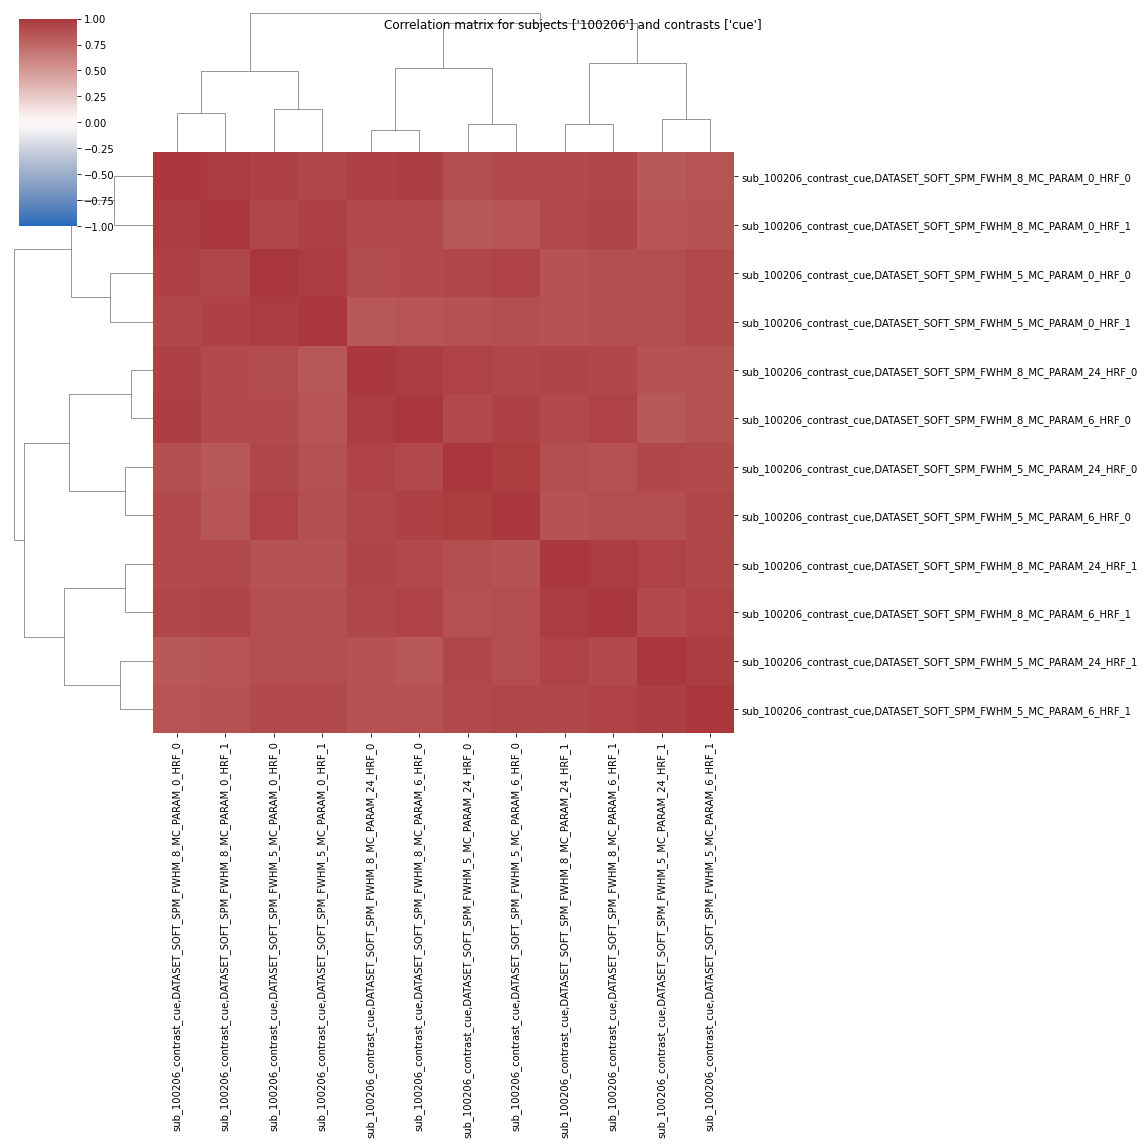

<Figure size 432x288 with 0 Axes>

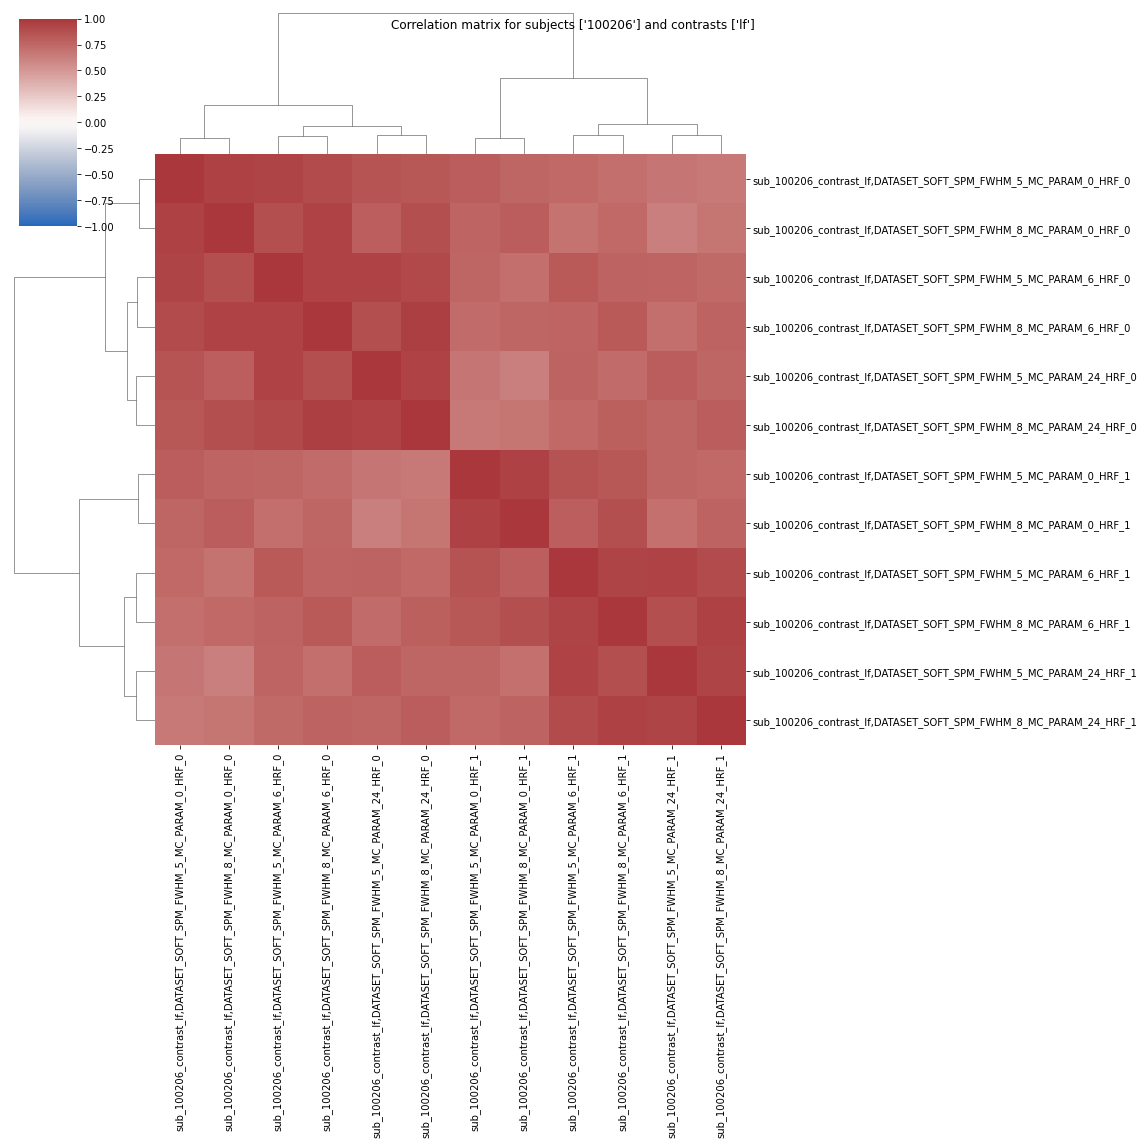

<Figure size 432x288 with 0 Axes>

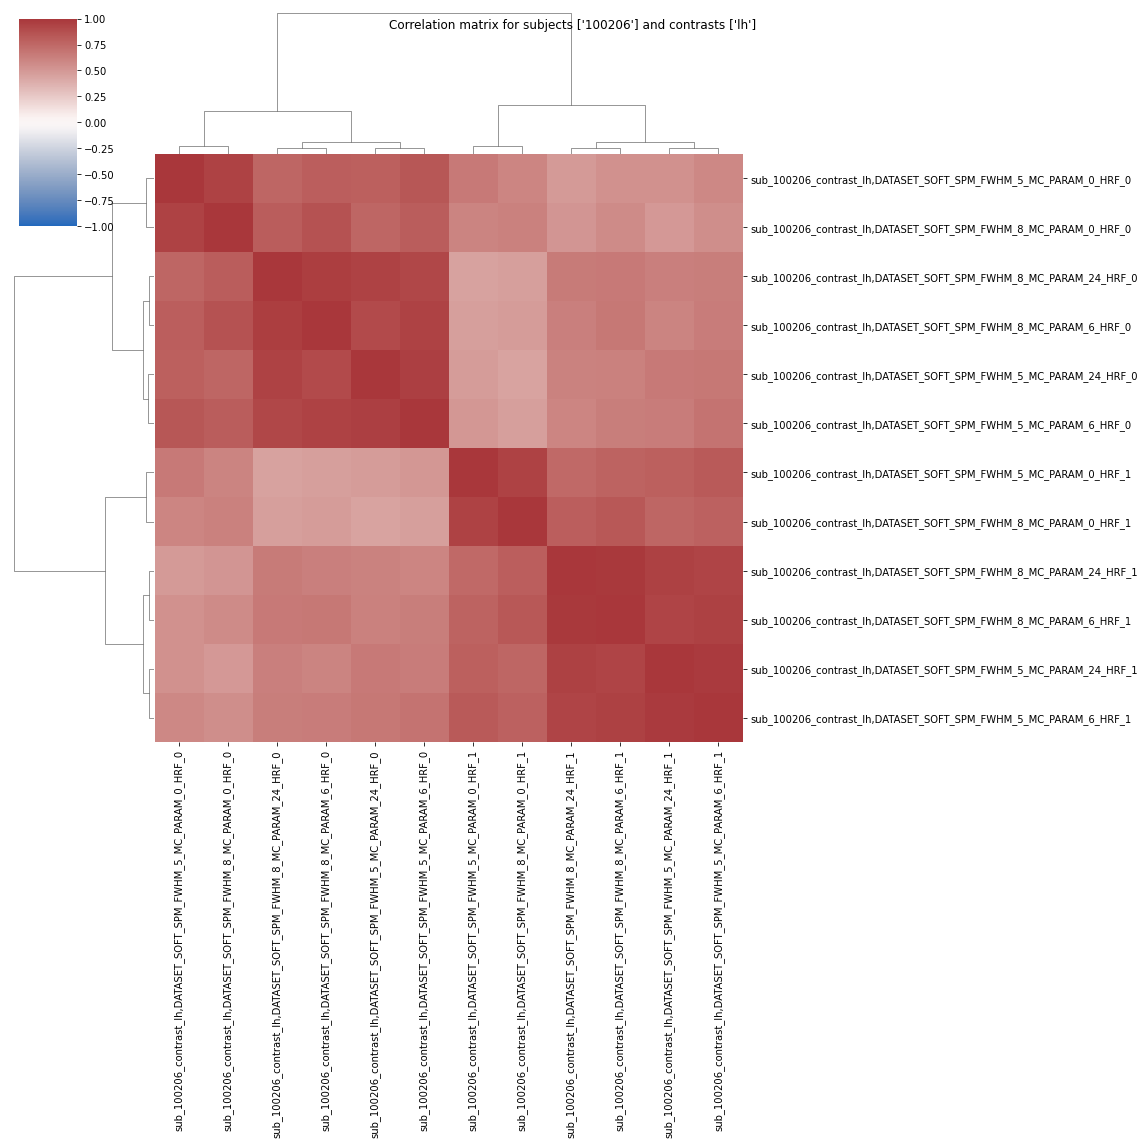

<Figure size 432x288 with 0 Axes>

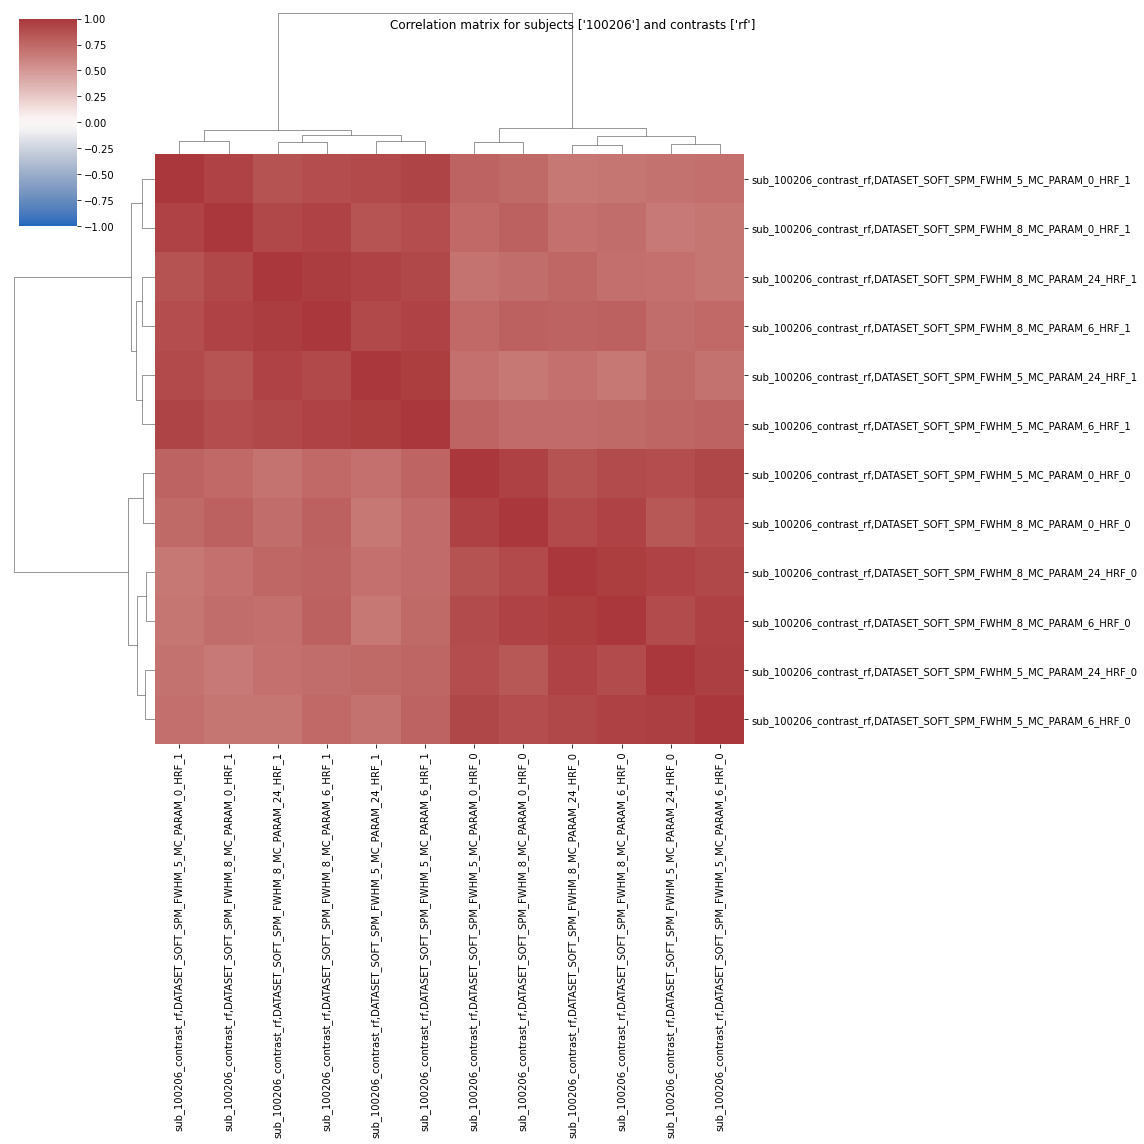

<Figure size 432x288 with 0 Axes>

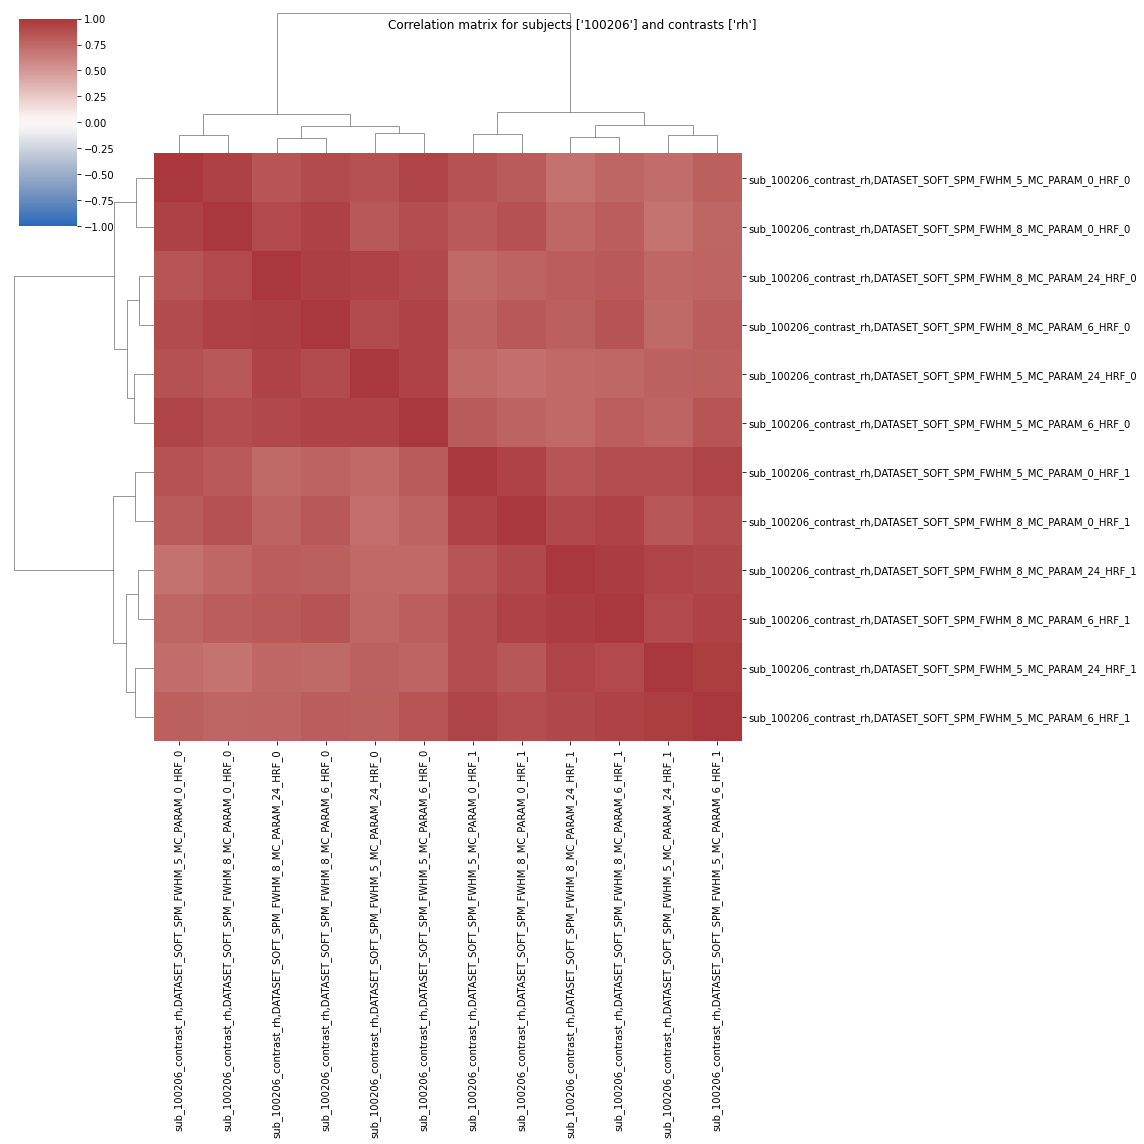

<Figure size 432x288 with 0 Axes>

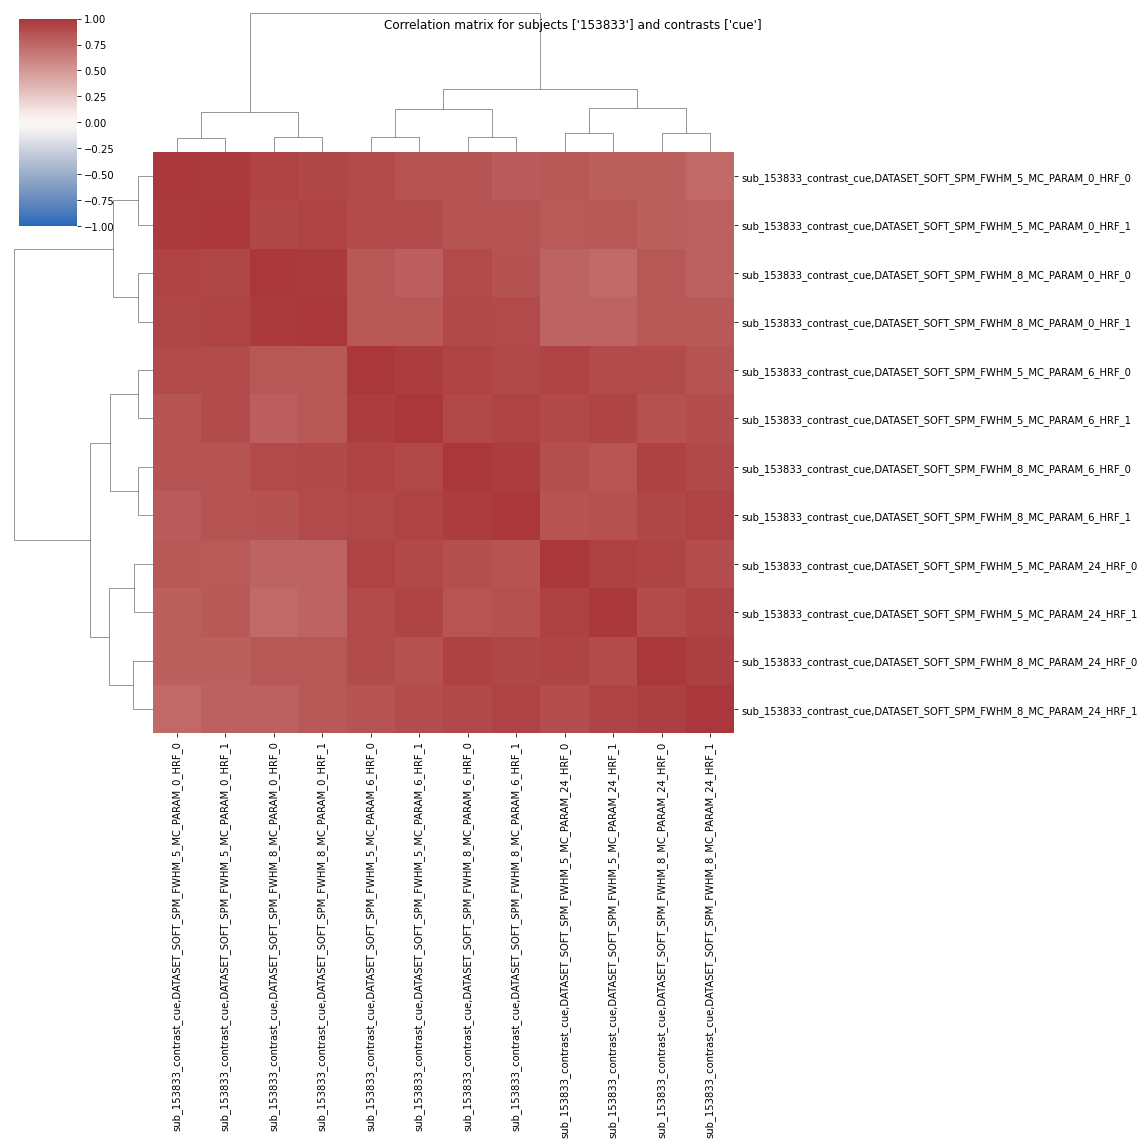

<Figure size 432x288 with 0 Axes>

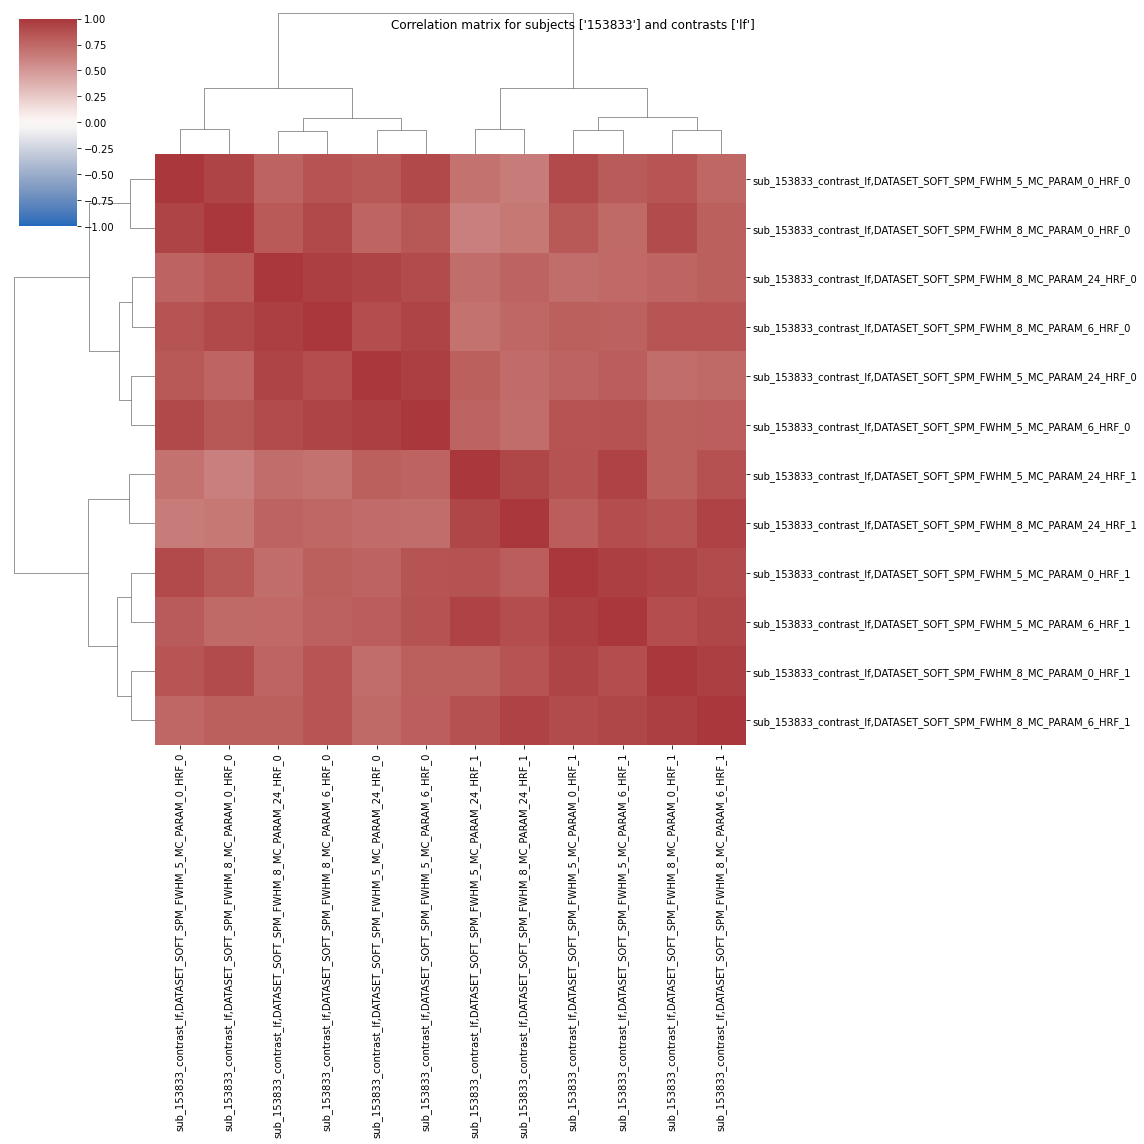

<Figure size 432x288 with 0 Axes>

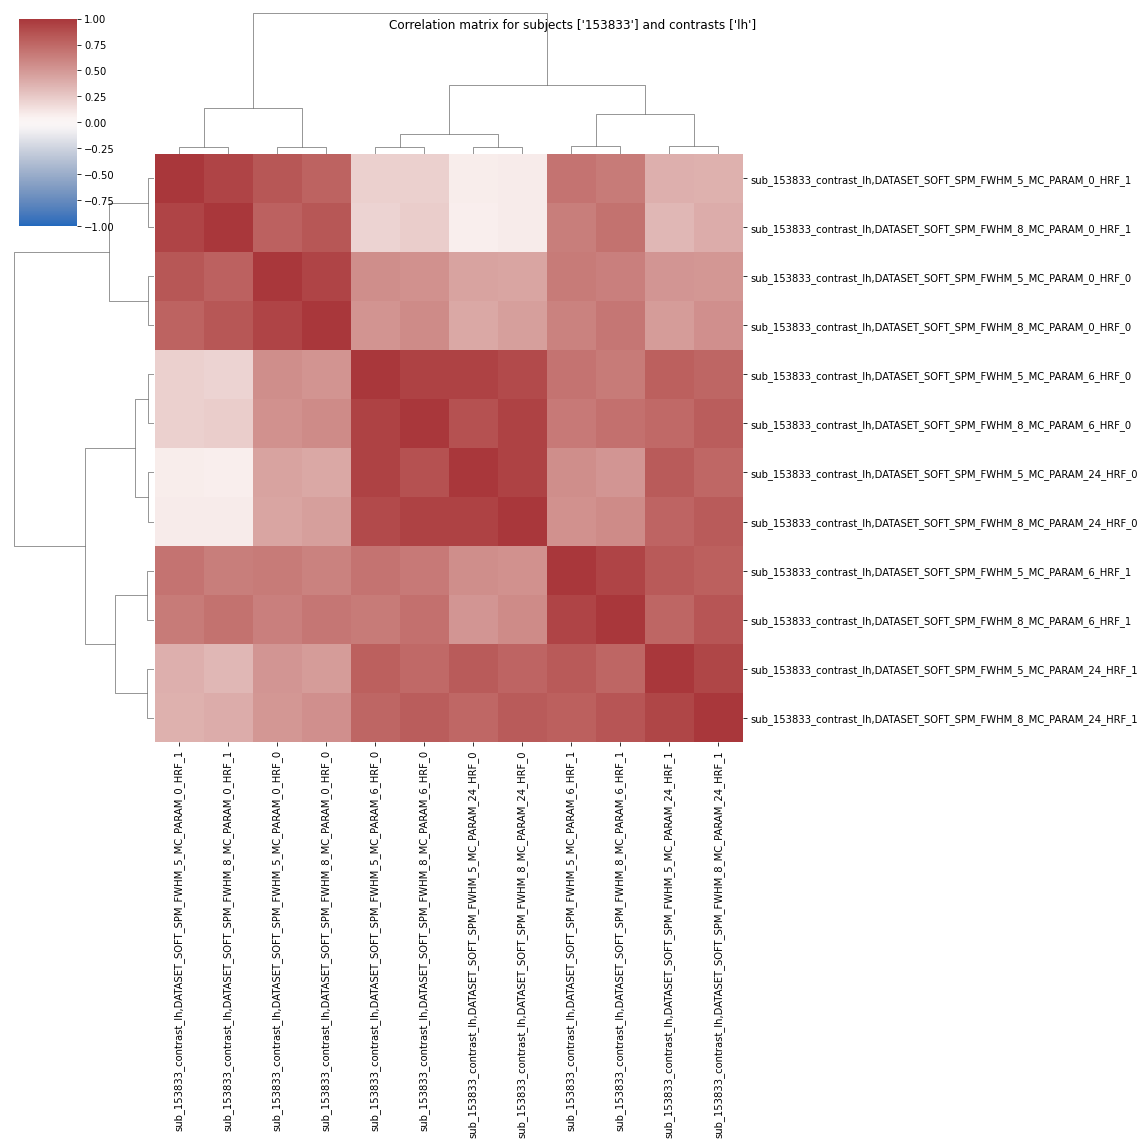

<Figure size 432x288 with 0 Axes>

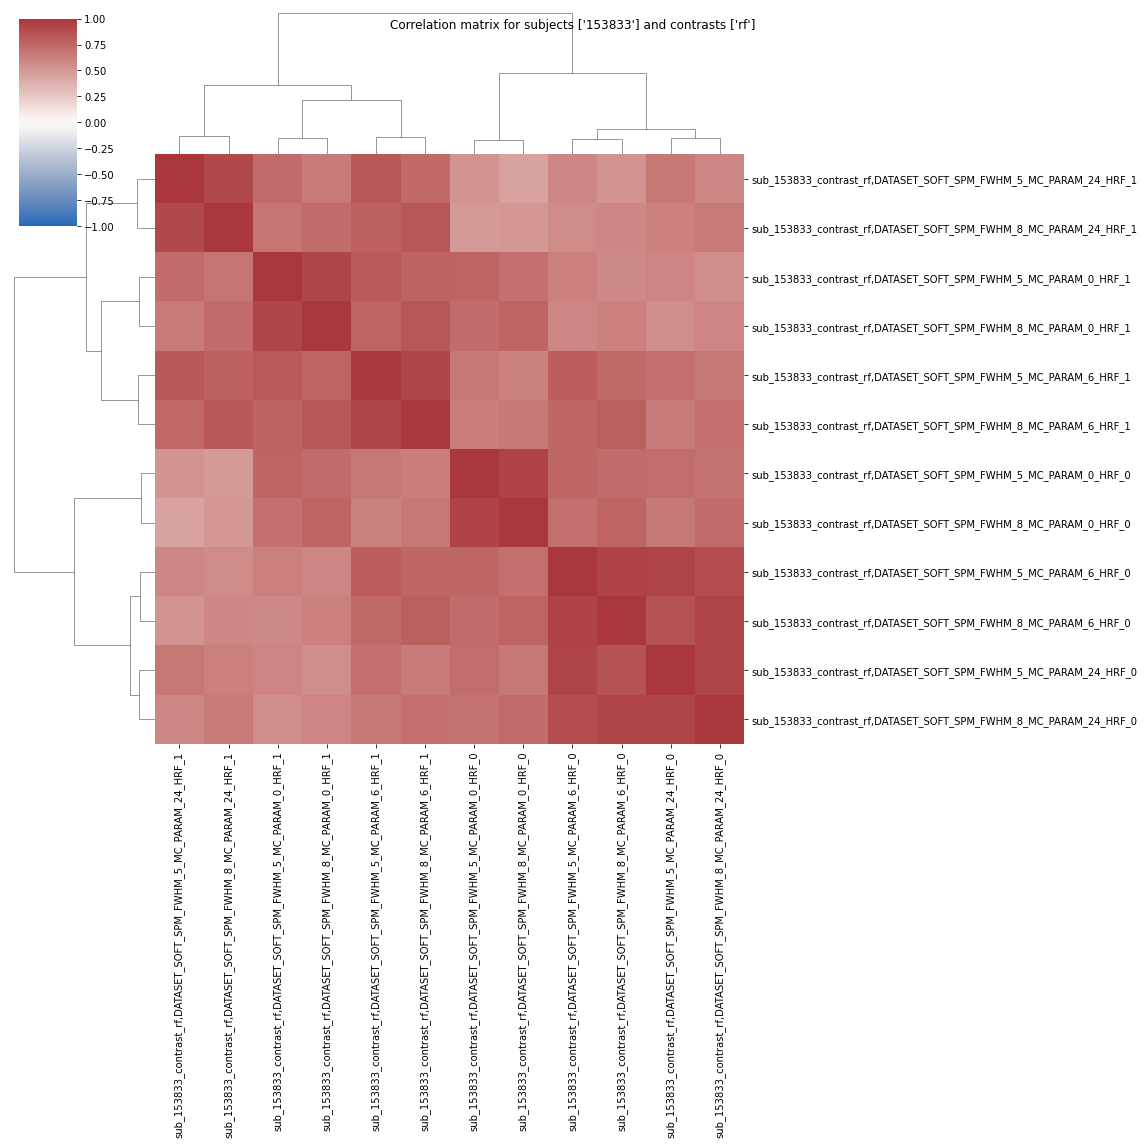

<Figure size 432x288 with 0 Axes>

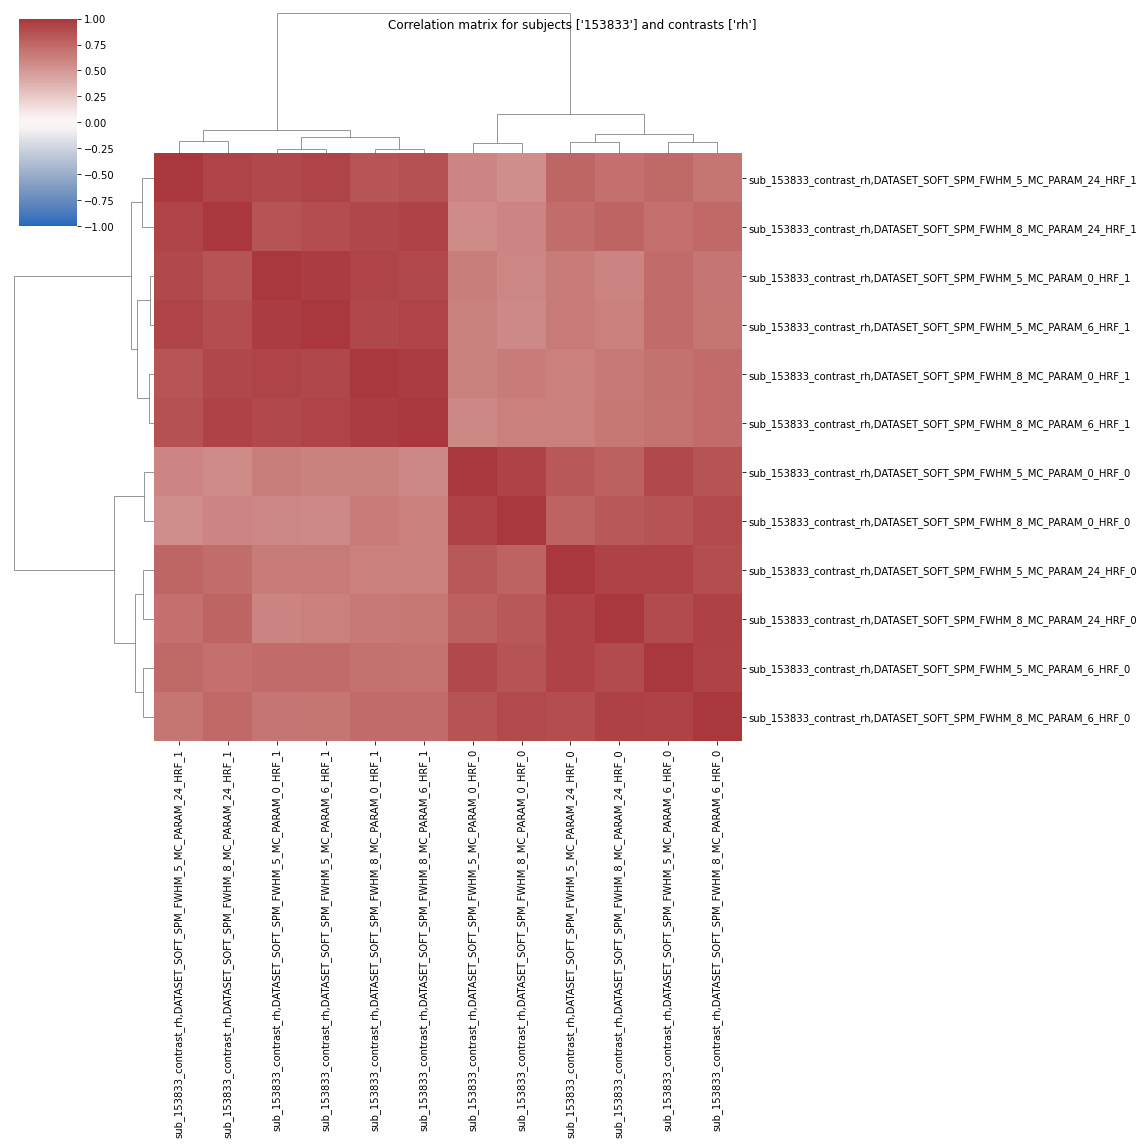

<Figure size 432x288 with 0 Axes>

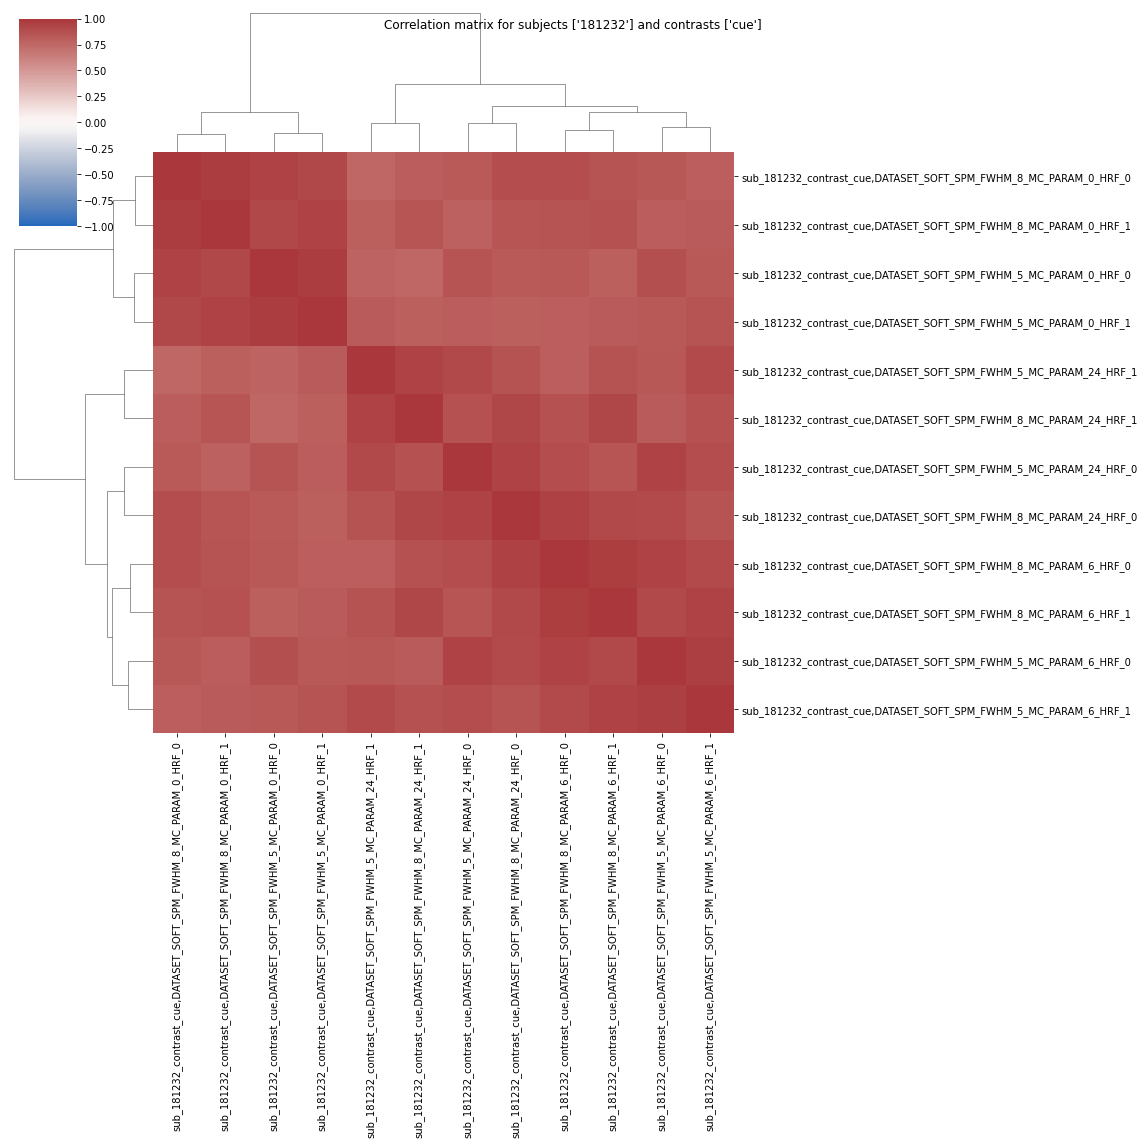

<Figure size 432x288 with 0 Axes>

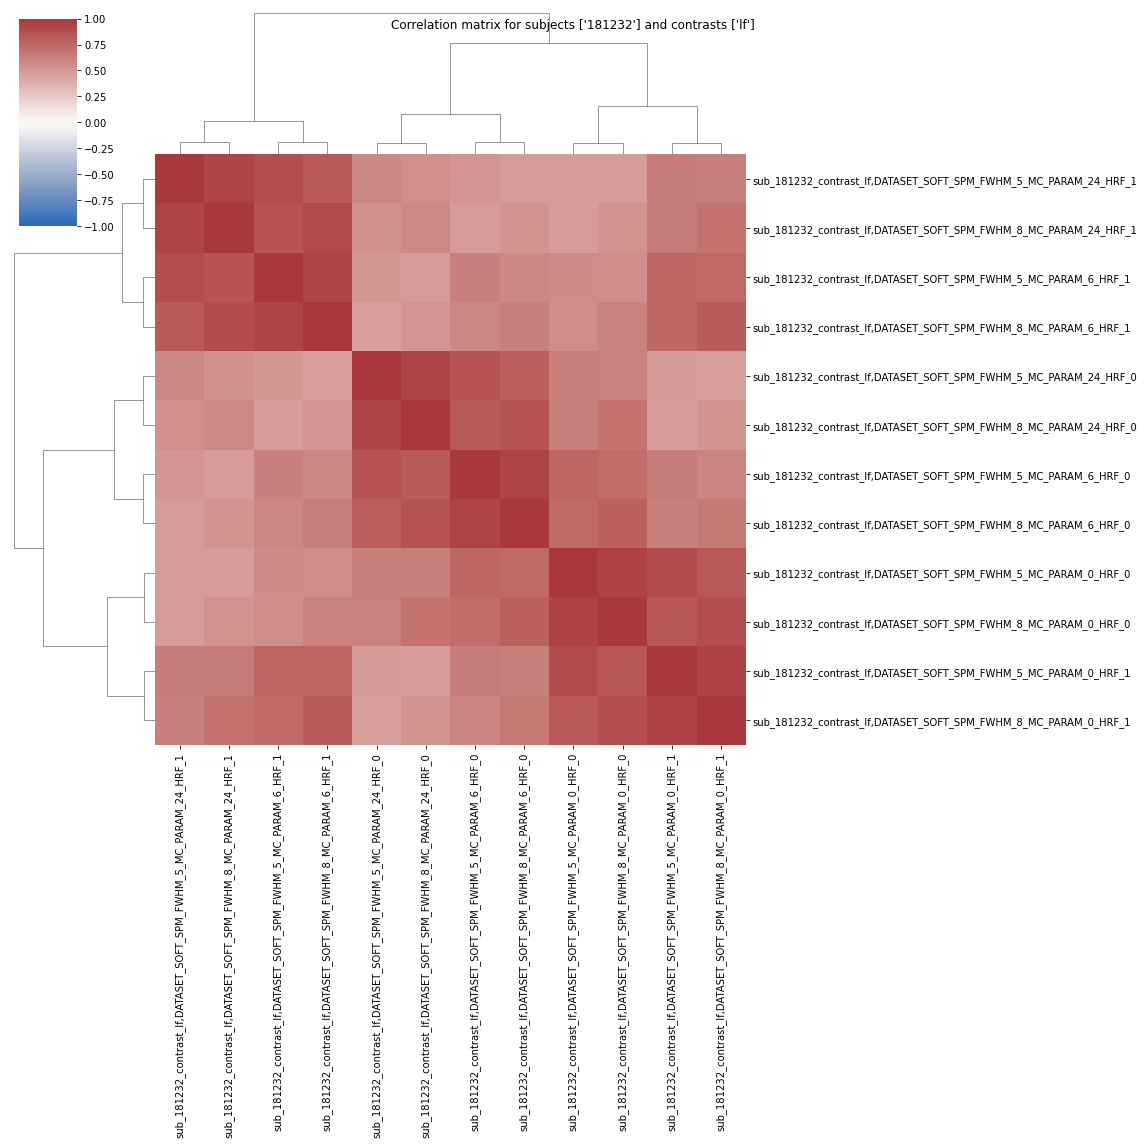

<Figure size 432x288 with 0 Axes>

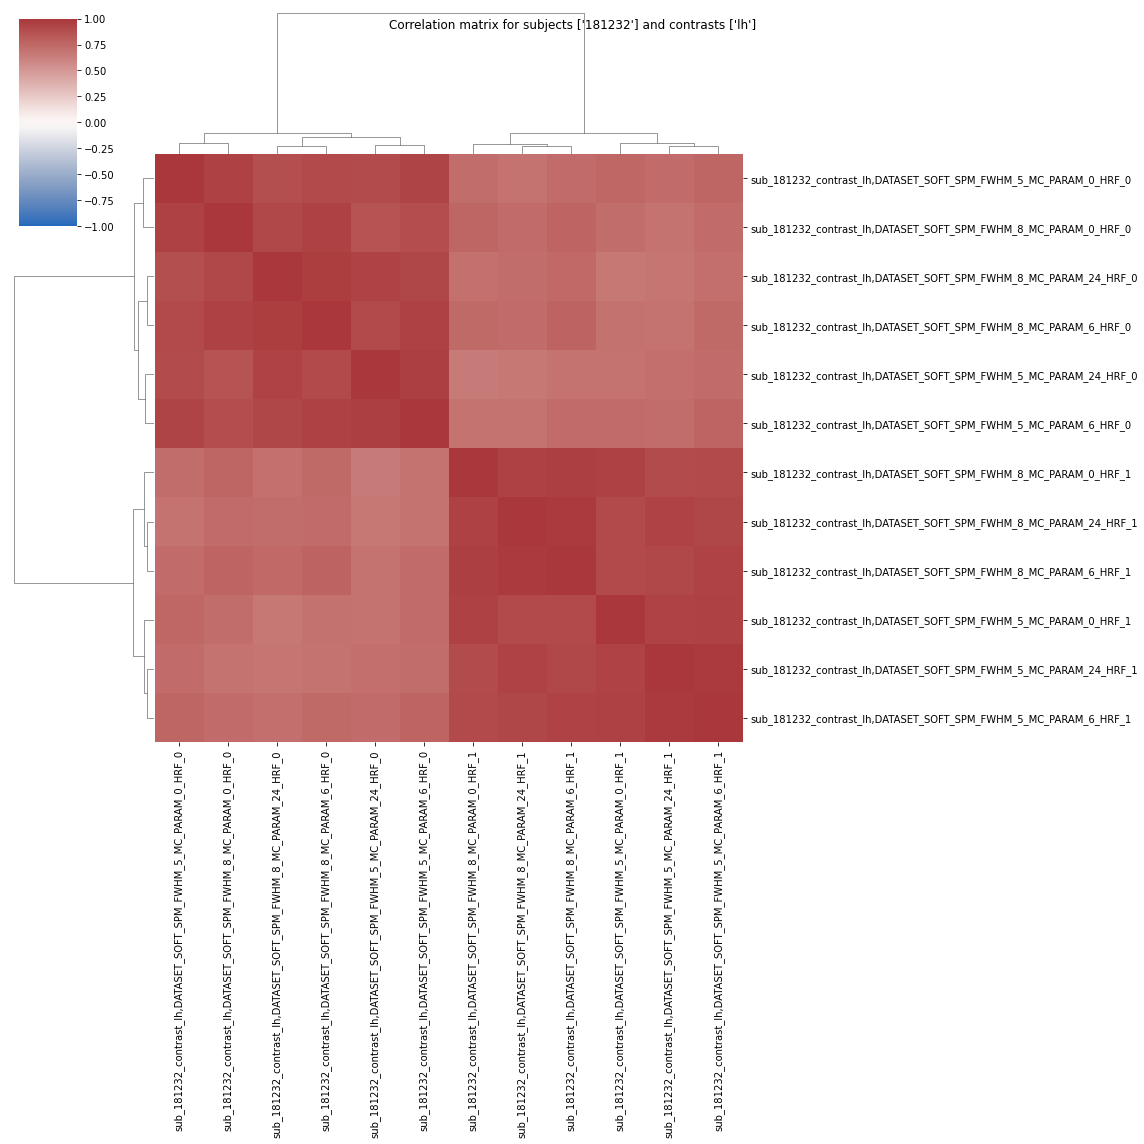

<Figure size 432x288 with 0 Axes>

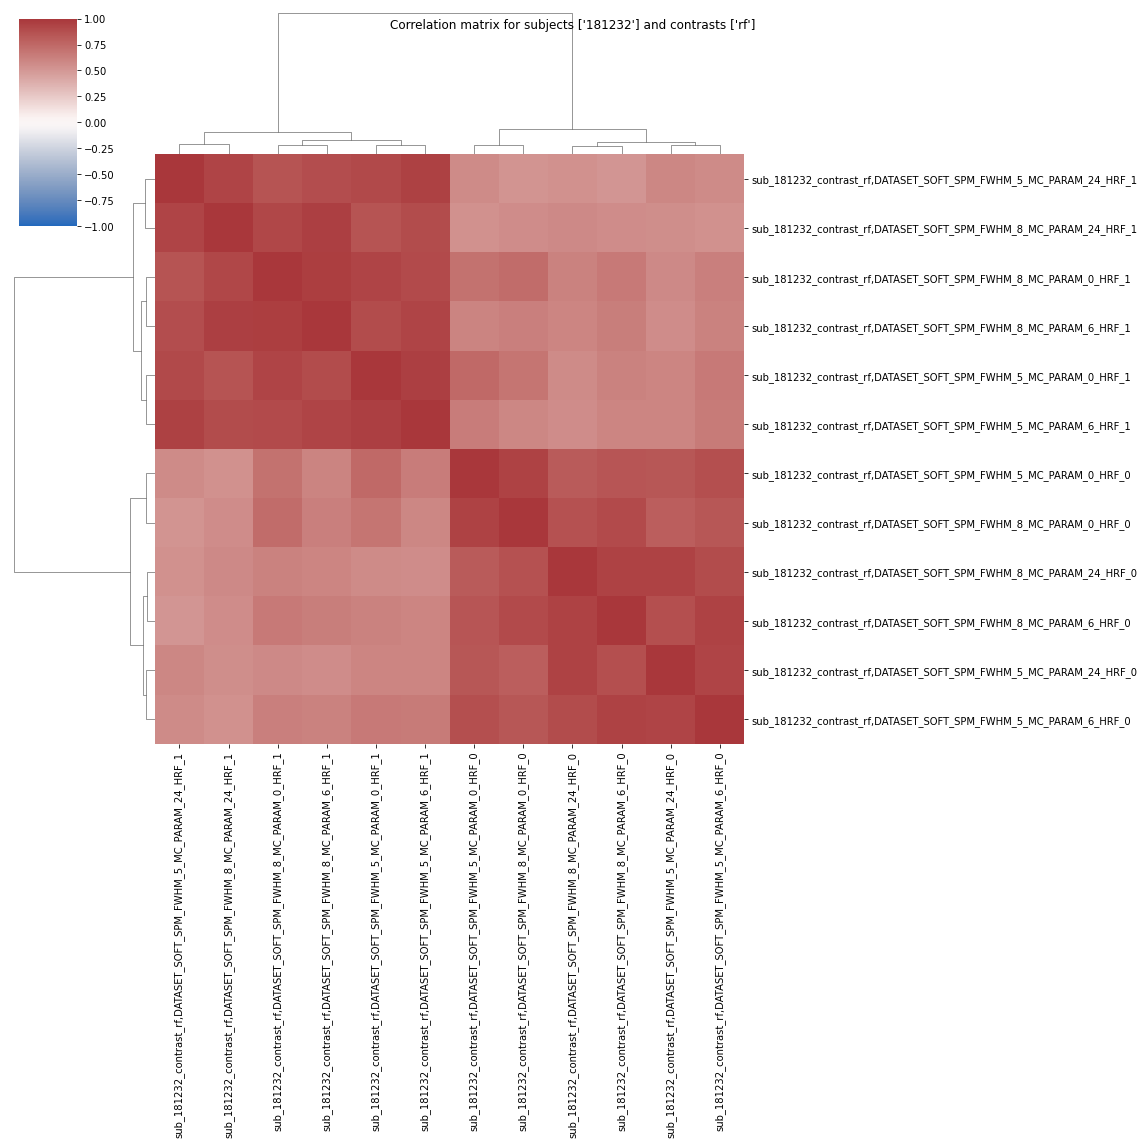

<Figure size 432x288 with 0 Axes>

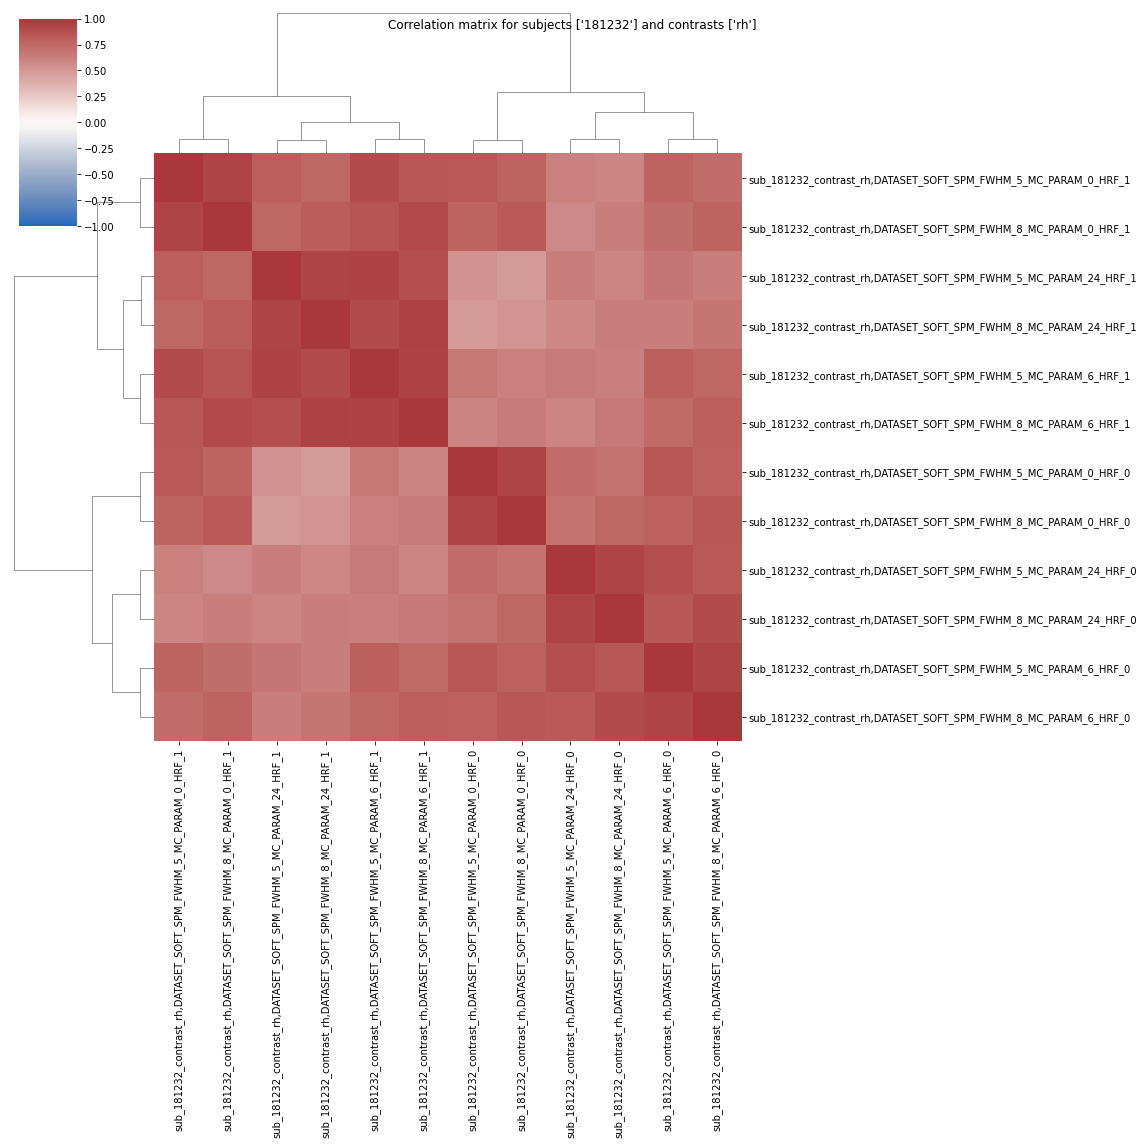

<Figure size 432x288 with 0 Axes>

In [1]:
from lib import correlation_matrices

data_dir = '/Users/egermani/Documents/hcp_pipelines/data/derived'
for subject in ['100206', '153833', '181232']:
    for con in ['cue', 'lf', 'lh', 'rf', 'rh']:
        correlation_matrices.plot_hierarchical_clustering([con], [subject], data_dir)

/Users/egermani/miniforge3/envs/workEnv/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
No handles with labels found to put in legend.


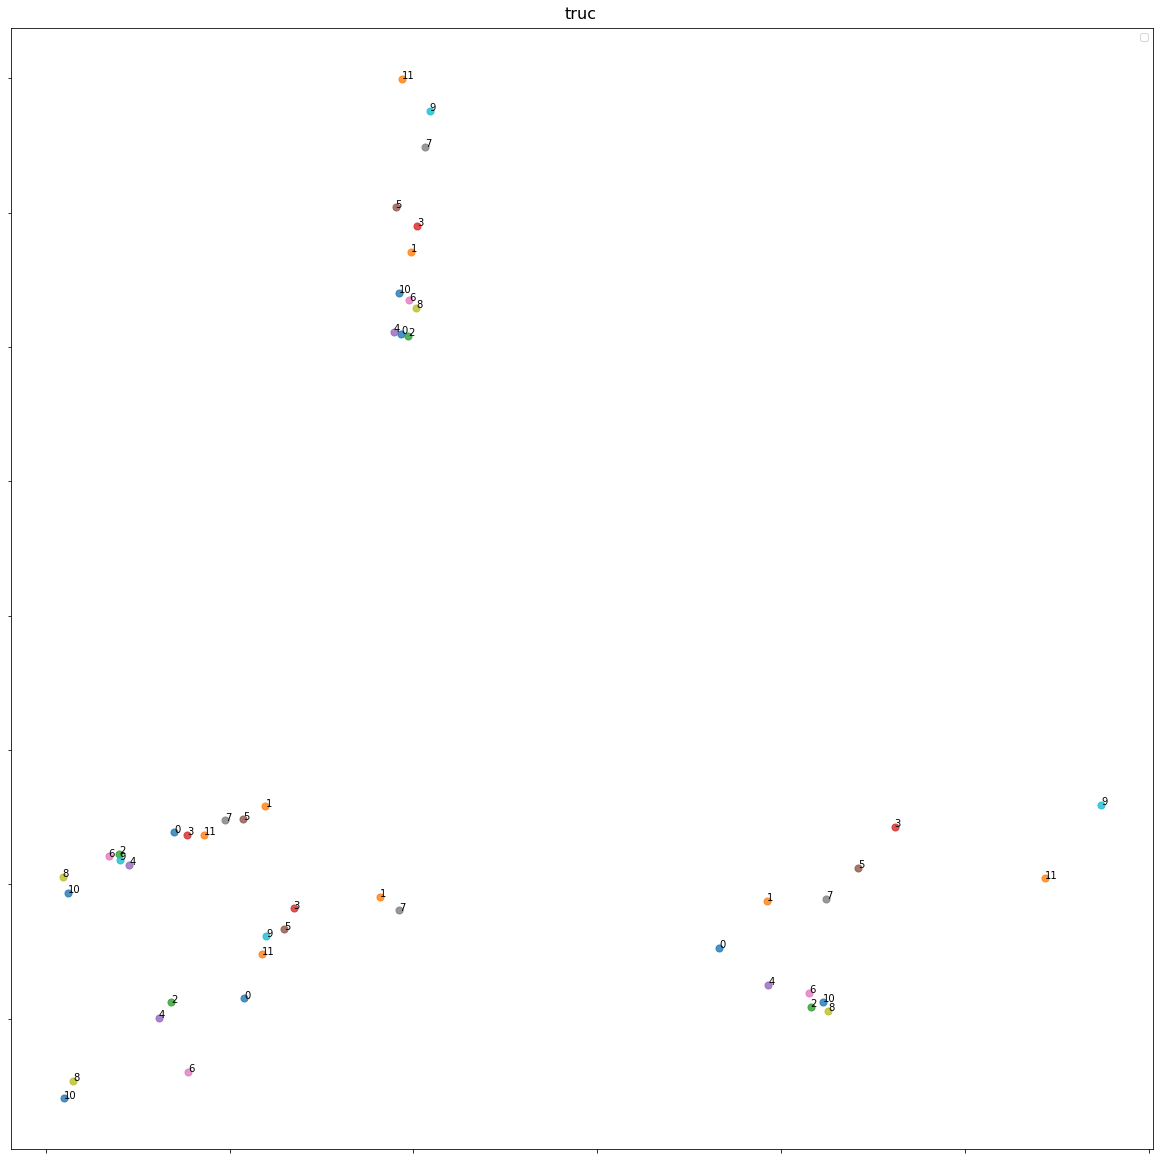

In [1]:
from lib import visual_distances

subjects = ['100206', '100307', '100408', '100610']
contrast_list=['lh']
map_dir = '/Users/egermani/Documents/pipeline_transition/data/preprocessed/*SPM*/resampled_masked_normalized_res_4'

visual_distances.plot_multisubject_maps(subjects, contrast_list, map_dir)

No handles with labels found to put in legend.


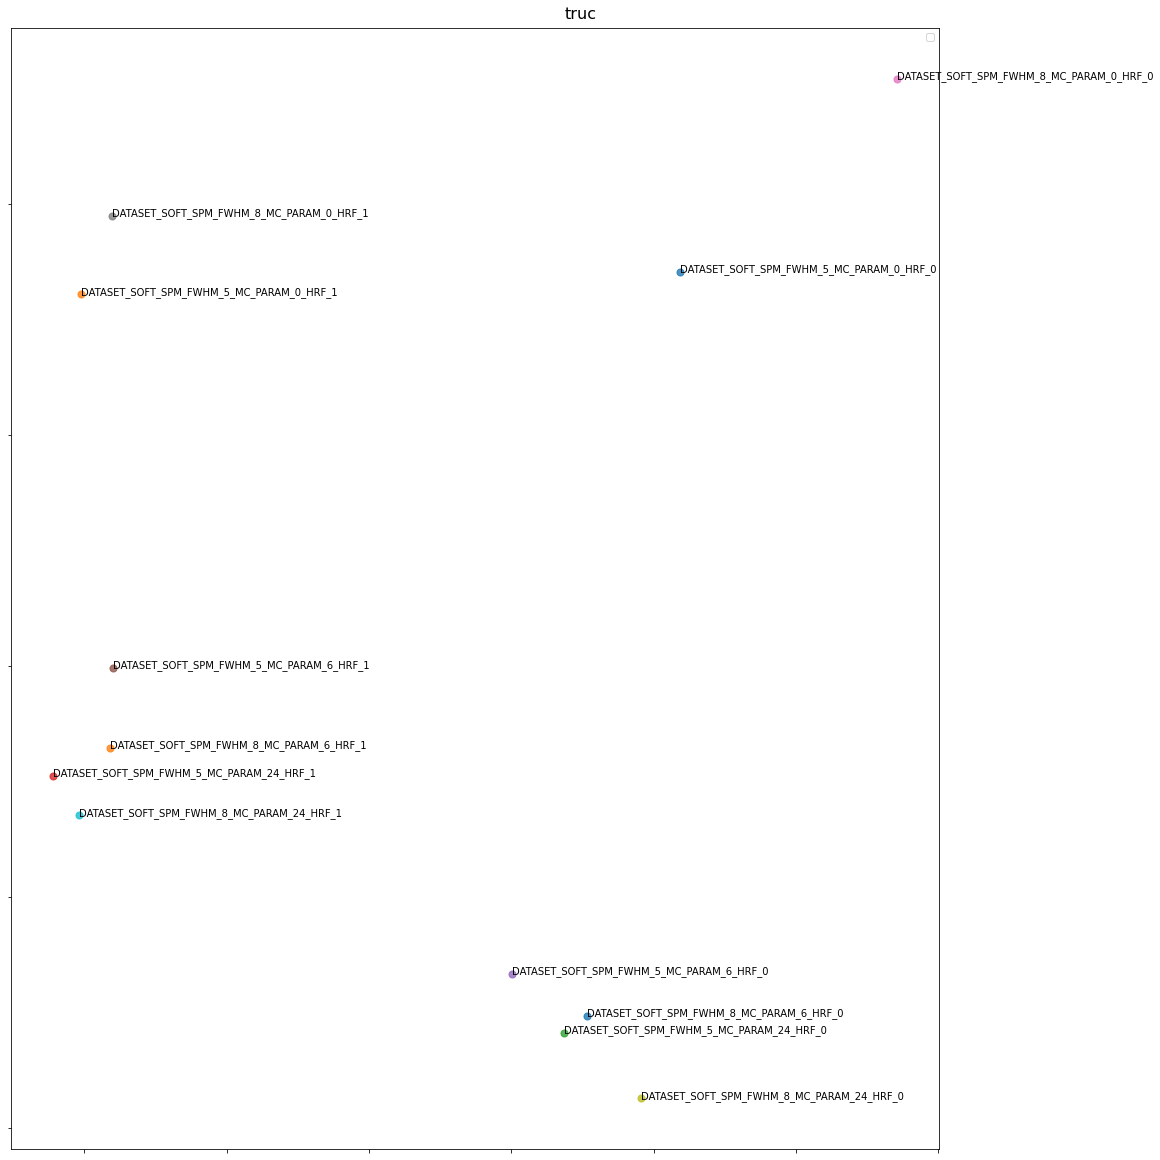

In [4]:
subjects = ['100206', '100307', '100408', '100610']
contrast_list=['lh']
map_dir ='/Users/egermani/Documents/pipeline_transition/data/preprocessed/*SPM*/resampled_masked_normalized_res_4'

visual_distances.plot_multisubject_maps(subjects, contrast_list, map_dir, encoder=True)